# Model K-prototypes

This Jupyter notebook is used to:

1. Run K-prototypes.
2. Visualize results.

## 0. Load the data

In [1]:
import pandas as pd
import os

# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

PREFIX_PATH = '/home/sramkova/diploma_thesis_data/cicids2017/attacks'
PREFIX_PATH = PREFIX_PATH + '/' + '/'.join(os.getcwd().split('/')[-2:]) + '/'
INPUT_CSV = PREFIX_PATH + 'final.csv'
print(INPUT_CSV)

data = pd.read_csv(INPUT_CSV, low_memory=False)
selected_df = data.copy()
selected_df.head(5)

/home/sramkova/diploma_thesis_data/cicids2017/attacks/2_thursday/web_attack_sql_injection/final.csv


originated_ip_num  responded_ip_num  connection.time  connection.duration  \
0            1.00000           0.75070          0.00892              0.00004   
1            1.00000           0.75070          0.91039              0.00004   
2            1.00000           0.67274          0.05100              0.16267   
3            1.00000           0.75070          0.11783              0.00003   
4            1.00000           0.19744          0.16311              0.00000   

   connection.orig_p  connection.orig_bytes  connection.orig_ip_bytes  \
0            0.76408                0.00872                   0.03473   
1            0.76551                0.00872                   0.03473   
2            0.76446                0.02193                   0.03683   
3            0.99241                0.00043                   0.00079   
4            0.76475                0.00000                   0.00059   

   connection.orig_pkts  connection.resp_p  connection.resp_bytes  ...  \
0               0.01568            0.00186                0.00018  ...   
1               0.01568            0.00186                0.00018  ...   
2               0.01387            0.00664                0.00700  ...   
3               0.00060            0.00050                0.00001  ...   
4               0.00030            0.00664                0.00000  ...   

   r_ip_bytes  connection.resp_pkts.1  protocol             service  \
0        4648                      28       tcp  gssapi,smb,dce_rpc   
1        4648                      28       tcp  gssapi,smb,dce_rpc   
2       62994                      50       tcp                 ssl   
3         150                       2       udp                 dns   
4           0                       0       tcp                none   

   conn_state       orig_p_cat       resp_p_cat  attacker_label  victim_label  \
0          SF  orig_reg_or_dyn  resp_well_known              No            No   
1          SF  orig_reg_or_dyn  resp_well_known              No            No   
2          SF  orig_reg_or_dyn         resp_443              No            No   
3          SF  orig_reg_or_dyn          resp_53              No            No   
4          SH  orig_reg_or_dyn         resp_443              No            No   

                     timestamp  
0  2017-07-06T13:35:16.061794Z  
1  2017-07-06T14:02:17.855831Z  
2  2017-07-06T13:36:31.772798Z  
3  2017-07-06T13:38:32.003958Z  
4  2017-07-06T13:39:53.447605Z  

[5 rows x 283 columns]

In [2]:
# shuffle 
selected_df = selected_df.sample(frac=1).reset_index(drop=True)
selected_df.head(5)

originated_ip_num  responded_ip_num  connection.time  connection.duration  \
0            1.00000           0.75070          0.55658              0.00000   
1            1.00000           0.75070          0.62742              0.00000   
2            1.00000           0.59320          0.02878              0.09723   
3            1.00000           0.75070          0.63302              0.00000   
4            1.00000           0.75070          0.18236              0.00000   

   connection.orig_p  connection.orig_bytes  connection.orig_ip_bytes  \
0            0.76909                0.00066                   0.00100   
1            0.82694                0.00126                   0.00157   
2            0.92937                0.01378                   0.01937   
3            0.77811                0.00084                   0.00117   
4            0.96740                0.00057                   0.00092   

   connection.orig_pkts  connection.resp_p  connection.resp_bytes  ...  \
0               0.00060            0.00050                0.00001  ...   
1               0.00060            0.00050                0.00003  ...   
2               0.00693            0.00093                0.00123  ...   
3               0.00060            0.00050                0.00004  ...   
4               0.00060            0.00050                0.00001  ...   

   r_ip_bytes  connection.resp_pkts.1  protocol  service  conn_state  \
0         182                       2       udp      dns          SF   
1         300                       2       udp      dns          SF   
2       11656                      25       tcp     http          SF   
3         432                       2       udp      dns          SF   
4         170                       2       udp      dns          SF   

        orig_p_cat  resp_p_cat  attacker_label  victim_label  \
0  orig_reg_or_dyn     resp_53              No            No   
1  orig_reg_or_dyn     resp_53              No            No   
2  orig_reg_or_dyn     resp_80              No            No   
3  orig_reg_or_dyn     resp_53              No            No   
4  orig_reg_or_dyn     resp_53              No            No   

                     timestamp  
0   2017-07-06T13:51:41.33192Z  
1  2017-07-06T13:53:48.770135Z  
2  2017-07-06T13:35:51.781432Z  
3  2017-07-06T13:53:58.848308Z  
4  2017-07-06T13:40:28.086684Z  

[5 rows x 283 columns]

## 1. K-prototypes

(https://towardsdatascience.com/the-k-prototype-as-clustering-algorithm-for-mixed-data-type-categorical-and-numerical-fe7c50538ebb
)

(https://github.com/nicodv/kmodes/blob/master/kmodes/kprototypes.py)

### Parameters of kmodes.kprototypes.KPrototypes: 

```
num_dissim: 
        Dissimilarity function used by the algorithm for numerical variables. 
        (default is euclidian_dissim)
        
cat_dissim: 
        For categorical variables. 
        (default is matching_dissim)
        
init: 
        Initial centroids.
        
gamma: 
        Weighing factor determining relative importance of numerical vs. categorical attributes. 
        (default is None, calculated from data)
        
n_jobs: 
        Number of jobs to use for the computation - each n_init runs in parallel. If -1 all CPUs are used. 
        (default is 1)
```

### Attributes: 

```
cluster_centroids_

labels_:
        Labels of each point (cluster l affiliation)
        
cost_: 
        Sum distance of all points to their respective cluster centroids.

n_iter_:
        The number of iterations the algorithm ran for.

epoch_costs_:
        Cost at each epoch.

gamma:
        The (potentially calculated) weighing factor.
```

In [4]:
import numpy as np
from kmodes.kprototypes import KPrototypes

In [5]:
print('Dimension data: {} rows and {} columns'.format(len(selected_df), len(selected_df.columns)))

Dimension data: 17908 rows and 283 columns


In [6]:
# selected_df.info()

In [7]:
# Inspect the categorical variables
selected_df.select_dtypes('object').nunique()

orig_orig_connection.protocol_mode          2
orig_orig_connection.service_mode           5
orig_orig_connection.conn_state_mode        2
orig_resp_connection.protocol_mode          3
orig_resp_connection.service_mode           6
orig_resp_connection.conn_state_mode        2
resp_orig_connection.protocol_mode          2
resp_orig_connection.service_mode           3
resp_orig_connection.conn_state_mode        3
resp_resp_connection.protocol_mode          2
resp_resp_connection.service_mode           7
resp_resp_connection.conn_state_mode        8
uid                                     17908
originated_ip                              14
responded_ip                             1380
protocol                                    2
service                                    14
conn_state                                  9
orig_p_cat                                  2
resp_p_cat                                  9
attacker_label                              2
victim_label                      

In [8]:
# Numerical
pd.set_option('display.max_columns', None)
selected_df.describe()

originated_ip_num  responded_ip_num  connection.time  \
count        17908.00000       17908.00000      17908.00000   
mean             0.99810           0.64673          0.43430   
std              0.04353           0.20784          0.26208   
min              0.00000           0.00000          0.00000   
25%              1.00000           0.67274          0.21571   
50%              1.00000           0.75070          0.46742   
75%              1.00000           0.75070          0.63757   
max              1.00000           1.00000          1.00000   

       connection.duration  connection.orig_p  connection.orig_bytes  \
count          17908.00000        17908.00000            17908.00000   
mean               0.01376            0.78071                0.00372   
std                0.03954            0.24478                0.01515   
min                0.00000            0.00000                0.00000   
25%                0.00000            0.76934                0.00041   
50%                0.00003            0.85335                0.00056   
75%                0.00111            0.93358                0.00257   
max                1.00000            1.00000                1.00000   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
count               17908.00000           17908.00000        17908.00000   
mean                    0.00603               0.00254            0.00312   
std                     0.02303               0.01472            0.03112   
min                     0.00000               0.00000            0.00000   
25%                     0.00076               0.00060            0.00050   
50%                     0.00093               0.00060            0.00050   
75%                     0.00486               0.00241            0.00093   
max                     1.00000               1.00000            1.00000   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
count            17908.00000               17908.00000           17908.00000   
mean                 0.00095                   0.00099               0.00250   
std                  0.01453                   0.01459               0.01809   
min                  0.00000                   0.00000               0.00000   
25%                  0.00001                   0.00002               0.00055   
50%                  0.00002                   0.00003               0.00055   
75%                  0.00009                   0.00013               0.00164   
max                  1.00000                   1.00000               1.00000   

        dns_count   ssh_count  http_count   ssl_count  files_count  \
count 17908.00000 17908.00000 17908.00000 17908.00000  17908.00000   
mean      0.66233     0.00352     0.07617     0.18679      0.01518   
std       0.47293     0.05921     0.26527     0.38975      0.04137   
min       0.00000     0.00000     0.00000     0.00000      0.00000   
25%       0.00000     0.00000     0.00000     0.00000      0.00000   
50%       1.00000     0.00000     0.00000     0.00000      0.00000   
75%       1.00000     0.00000     0.00000     0.00000      0.00000   
max       1.00000     1.00000     1.00000     1.00000      1.00000   

       orig_orig_total  orig_orig_connection.time_mean  \
count      17908.00000                     17908.00000   
mean           0.45726                         0.44333   
std            0.27119                         0.25739   
min            0.00000                         0.00000   
25%            0.21124                         0.21431   
50%            0.46337                         0.42813   
75%            0.64764                         0.63025   
max            1.00000                         1.00000   

       orig_orig_connection.duration_mean  \
count                         17908.00000   
mean                              0.20956   
std                               0.13779   
min                               0.00000   
25%  

In [9]:
# Columns names as constant lists for easier usage:

# columns that contain values of the current main connection
CONN_IDS_COLS = ['connection.uid', 'originated_ip', 'responded_ip']

CONN_NUMERICAL_COLS = ['connection.time', 
                       'connection.duration', 
                       # originator details
                       'connection.orig_p', 
                       'connection.orig_bytes', 
                       #'connection.orig_ip_bytes', 
                       'connection.orig_pkts', 
                       # responder details
                       'connection.resp_p', 
                       'connection.resp_bytes', 
                       #'connection.resp_ip_bytes', 
                       'connection.resp_pkts']

CONN_CATEGORICAL_COLS = ['connection.proto', 
                         'connection.service', 
                         'connection.conn_state']

CONN_APP_STATS = ['dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']

# originator originated neighbrouhood columns:
ORIG_ORIG_NUMERICAL_COLS = ['orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            #'orig_orig_connection.orig_p_mean', 
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            #'orig_orig_connection.resp_p_mean', 
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean']
                            
ORIG_ORIG_CATEGORICAL_COLS = ['orig_orig_connection.protocol_mode', 
                              'orig_orig_connection.service_mode', 
                              'orig_orig_connection.conn_state_mode']

ORIG_ORIG_PORTS_COLS = ['orig_orig_orig_p_well_known_count', 
                        'orig_orig_orig_p_reg_or_dyn_count', 
                        'orig_orig_resp_p_21_count', 
                        'orig_orig_resp_p_22_count',
                        'orig_orig_resp_p_53_count', 
                        'orig_orig_resp_p_80_count', 
                        'orig_orig_resp_p_123_count', 
                        'orig_orig_resp_p_443_count', 
                        'orig_orig_resp_p_3389_count',
                        'orig_orig_resp_p_well_known_count', 
                        'orig_orig_resp_p_reg_count', 
                        'orig_orig_resp_p_dyn_count']

ORIG_ORIG_APP_STATS_COLS = ['orig_orig_dns_count_mean', 
                            'orig_orig_ssh_count_mean', 
                            'orig_orig_http_count_mean', 
                            'orig_orig_ssl_count_mean', 
                            'orig_orig_files_count_mean']

ORIG_ORIG_SIMILAR_COLS = ['orig_orig_similar_conns_count',
                          'orig_orig_similar_dns_qtype_count', 
                          'orig_orig_similar_dns_rcode_count', 
                          'orig_orig_similar_ssh_auth_attempts_count', 
                          'orig_orig_similar_ssh_host_key_count', 
                          'orig_orig_similar_http_method_count',
                          'orig_orig_similar_http_status_code_count', 
                          'orig_orig_similar_http_user_agent_count',
                          'orig_orig_similar_ssl_version_count', 
                          'orig_orig_similar_ssl_cipher_count', 
                          'orig_orig_similar_ssl_curve_count',
                          'orig_orig_similar_ssl_validation_status_count', 
                          'orig_orig_similar_files_source_count', 
                          'orig_orig_similar_file_md5_count']

# originator responded neighbrouhood columns:
ORIG_RESP_NUMERICAL_COLS = ['orig_resp_total', 
                            'orig_resp_connection.time_mean', 
                            'orig_resp_connection.duration_mean',
                            #'orig_resp_connection.orig_p_mean', 
                            'orig_resp_connection.orig_pkts_mean',
                            'orig_resp_connection.orig_bytes_mean',
                            #'orig_resp_connection.resp_p_mean', 
                            'orig_resp_connection.resp_bytes_mean',
                            'orig_resp_connection.resp_pkts_mean']
                            
ORIG_RESP_CATEGORICAL_COLS = ['orig_resp_connection.protocol_mode', 
                              'orig_resp_connection.service_mode', 
                              'orig_resp_connection.conn_state_mode']

ORIG_RESP_PORTS_COLS = ['orig_resp_orig_p_well_known_count', 
                        'orig_resp_orig_p_reg_or_dyn_count', 
                        'orig_resp_resp_p_21_count', 
                        'orig_resp_resp_p_22_count',
                        'orig_resp_resp_p_53_count', 
                        'orig_resp_resp_p_80_count', 
                        'orig_resp_resp_p_123_count', 
                        'orig_resp_resp_p_443_count', 
                        'orig_resp_resp_p_3389_count',
                        'orig_resp_resp_p_well_known_count', 
                        'orig_resp_resp_p_reg_count', 
                        'orig_resp_resp_p_dyn_count']

ORIG_RESP_APP_STATS_COLS = ['orig_resp_dns_count_mean', 
                            'orig_resp_ssh_count_mean', 
                            'orig_resp_http_count_mean', 
                            'orig_resp_ssl_count_mean', 
                            'orig_resp_files_count_mean']

ORIG_RESP_SIMILAR_COLS = ['orig_resp_similar_conns_count',
                          'orig_resp_similar_dns_qtype_count', 
                          'orig_resp_similar_dns_rcode_count', 
                          'orig_resp_similar_ssh_auth_attempts_count', 
                          'orig_resp_similar_ssh_host_key_count', 
                          'orig_resp_similar_http_method_count',
                          'orig_resp_similar_http_status_code_count', 
                          'orig_resp_similar_http_user_agent_count',
                          'orig_resp_similar_ssl_version_count', 
                          'orig_resp_similar_ssl_cipher_count', 
                          'orig_resp_similar_ssl_curve_count',
                          'orig_resp_similar_ssl_validation_status_count', 
                          'orig_resp_similar_files_source_count', 
                          'orig_resp_similar_file_md5_count']

# responder originated neighbrouhood columns:
RESP_ORIG_NUMERICAL_COLS = ['resp_orig_total', 
                            'resp_orig_connection.time_mean', 
                            'resp_orig_connection.duration_mean',
                            #'resp_orig_connection.orig_p_mean', 
                            'resp_orig_connection.orig_pkts_mean',
                            'resp_orig_connection.orig_bytes_mean',
                            #'resp_orig_connection.resp_p_mean', 
                            'resp_orig_connection.resp_bytes_mean',
                            'resp_orig_connection.resp_pkts_mean']
                            
RESP_ORIG_CATEGORICAL_COLS = ['resp_orig_connection.protocol_mode', 
                              'resp_orig_connection.service_mode', 
                              'resp_orig_connection.conn_state_mode']

RESP_ORIG_PORTS_COLS = ['resp_orig_orig_p_well_known_count', 
                        'resp_orig_orig_p_reg_or_dyn_count', 
                        'resp_orig_resp_p_21_count', 
                        'resp_orig_resp_p_22_count',
                        'resp_orig_resp_p_53_count', 
                        'resp_orig_resp_p_80_count', 
                        'resp_orig_resp_p_123_count', 
                        'resp_orig_resp_p_443_count', 
                        'resp_orig_resp_p_3389_count',
                        'resp_orig_resp_p_well_known_count', 
                        'resp_orig_resp_p_reg_count', 
                        'resp_orig_resp_p_dyn_count']

RESP_ORIG_APP_STATS_COLS = ['resp_orig_dns_count_mean', 
                            'resp_orig_ssh_count_mean', 
                            'resp_orig_http_count_mean', 
                            'resp_orig_ssl_count_mean', 
                            'resp_orig_files_count_mean']

RESP_ORIG_SIMILAR_COLS = ['resp_orig_similar_conns_count',
                          'resp_orig_similar_dns_qtype_count', 
                          'resp_orig_similar_dns_rcode_count', 
                          'resp_orig_similar_ssh_auth_attempts_count', 
                          'resp_orig_similar_ssh_host_key_count', 
                          'resp_orig_similar_http_method_count',
                          'resp_orig_similar_http_status_code_count', 
                          'resp_orig_similar_http_user_agent_count',
                          'resp_orig_similar_ssl_version_count', 
                          'resp_orig_similar_ssl_cipher_count', 
                          'resp_orig_similar_ssl_curve_count',
                          'resp_orig_similar_ssl_validation_status_count', 
                          'resp_orig_similar_files_source_count', 
                          'resp_orig_similar_file_md5_count']

# responder responded neighbrouhood columns:
RESP_RESP_NUMERICAL_COLS = ['resp_resp_total', 
                            'resp_resp_connection.time_mean', 
                            'resp_resp_connection.duration_mean',
                            #'resp_resp_connection.orig_p_mean', 
                            'resp_resp_connection.orig_pkts_mean',
                            'resp_resp_connection.orig_bytes_mean',
                            #'resp_resp_connection.resp_p_mean', 
                            'resp_resp_connection.resp_bytes_mean',
                            'resp_resp_connection.resp_pkts_mean']
                            
RESP_RESP_CATEGORICAL_COLS = ['resp_resp_connection.protocol_mode', 
                              'resp_resp_connection.service_mode', 
                              'resp_resp_connection.conn_state_mode']

RESP_RESP_PORTS_COLS = ['resp_resp_orig_p_well_known_count', 
                        'resp_resp_orig_p_reg_or_dyn_count', 
                        'resp_resp_resp_p_21_count', 
                        'resp_resp_resp_p_22_count',
                        'resp_resp_resp_p_53_count', 
                        'resp_resp_resp_p_80_count', 
                        'resp_resp_resp_p_123_count', 
                        'resp_resp_resp_p_443_count', 
                        'resp_resp_resp_p_3389_count',
                        'resp_resp_resp_p_well_known_count', 
                        'resp_resp_resp_p_reg_count', 
                        'resp_resp_resp_p_dyn_count']

RESP_RESP_APP_STATS_COLS = ['resp_resp_dns_count_mean', 
                            'resp_resp_ssh_count_mean', 
                            'resp_resp_http_count_mean', 
                            'resp_resp_ssl_count_mean', 
                            'resp_resp_files_count_mean']

RESP_RESP_SIMILAR_COLS = ['resp_resp_similar_conns_count',
                          'resp_resp_similar_dns_qtype_count', 
                          'resp_resp_similar_dns_rcode_count', 
                          'resp_resp_similar_ssh_auth_attempts_count', 
                          'resp_resp_similar_ssh_host_key_count', 
                          'resp_resp_similar_http_method_count',
                          'resp_resp_similar_http_status_code_count', 
                          'resp_resp_similar_http_user_agent_count',
                          'resp_resp_similar_ssl_version_count', 
                          'resp_resp_similar_ssl_cipher_count', 
                          'resp_resp_similar_ssl_curve_count',
                          'resp_resp_similar_ssl_validation_status_count', 
                          'resp_resp_similar_files_source_count', 
                          'resp_resp_similar_file_md5_count']

# categorical
OHE_ORIG_P_CAT_COLS = ['orig_p_cat_orig_reg_or_dyn', 
                       'orig_p_cat_orig_well_known']

OHE_RESP_P_CAT_COLS = ['resp_p_cat_resp_123', 
                       'resp_p_cat_resp_21', 
                       'resp_p_cat_resp_22',
                       'resp_p_cat_resp_443', 
                       'resp_p_cat_resp_53',
                       'resp_p_cat_resp_80', 
                       'resp_p_cat_resp_dyn', 
                       'resp_p_cat_resp_reg',
                       'resp_p_cat_resp_well_known']

BACKUP_COLS = ['attacker_label', 'victim_label', 'connection.ts']

In [10]:
def load_col_names(list_name, file_path):
    f = open(file_path, 'r')
    for ohe_col in f:
        list_name.append(ohe_col.strip())
    f.close()
    # print(list_name)

In [ ]:
OHE_PROTO_CAT_COLS = []
OHE_SERVICE_CAT_COLS = []
OHE_CONN_STATE_CAT_COLS = []
ORIG_ORIG_OHE_CAT_COLS = []
ORIG_RESP_OHE_CAT_COLS = []
RESP_ORIG_OHE_CAT_COLS = []
RESP_RESP_OHE_CAT_COLS = []

load_col_names(OHE_PROTO_CAT_COLS,  PREFIX_PATH + 'ohe_proto_cat_cols.txt')
load_col_names(OHE_SERVICE_CAT_COLS,  PREFIX_PATH + 'ohe_service_cat_cols.txt')
load_col_names(OHE_CONN_STATE_CAT_COLS,  PREFIX_PATH + 'ohe_conn_state_cat_cols.txt')
load_col_names(ORIG_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'orig_orig_categorical_cols.txt')
load_col_names(ORIG_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'orig_resp_categorical_cols.txt')
load_col_names(RESP_ORIG_OHE_CAT_COLS,  PREFIX_PATH + 'resp_orig_categorical_cols.txt')
load_col_names(RESP_RESP_OHE_CAT_COLS,  PREFIX_PATH + 'resp_resp_categorical_cols.txt')

In [12]:
df = selected_df.filter(CONN_NUMERICAL_COLS + 
                        # categorical
                        ['orig_p_cat', 
                         'resp_p_cat',
                         'protocol',
                         'service', 
                         'conn_state'] + 
                        CONN_APP_STATS + 
                        
                        # originator neighbourhood
                        ORIG_ORIG_NUMERICAL_COLS + 
                        ORIG_ORIG_PORTS_COLS + 
                        ORIG_ORIG_APP_STATS_COLS + 
                        ORIG_ORIG_SIMILAR_COLS + 
                        # originator categorical neighbourhood 
                        ORIG_ORIG_CATEGORICAL_COLS + 
                        
                        # originator neighbourhood
                        ORIG_RESP_NUMERICAL_COLS + 
                        ORIG_RESP_PORTS_COLS + 
                        ORIG_RESP_APP_STATS_COLS + 
                        ORIG_RESP_SIMILAR_COLS + 
                        # originator categorical neighbourhood 
                        ORIG_RESP_CATEGORICAL_COLS + 
                        
                        # originator neighbourhood
                        RESP_ORIG_NUMERICAL_COLS + 
                        RESP_ORIG_PORTS_COLS + 
                        RESP_ORIG_APP_STATS_COLS + 
                        RESP_ORIG_SIMILAR_COLS + 
                        # originator categorical neighbourhood 
                        RESP_ORIG_CATEGORICAL_COLS + 
                        
                        # originator neighbourhood
                        RESP_RESP_NUMERICAL_COLS + 
                        RESP_RESP_PORTS_COLS + 
                        RESP_RESP_APP_STATS_COLS + 
                        RESP_RESP_SIMILAR_COLS + 
                        # originator categorical neighbourhood 
                        RESP_RESP_CATEGORICAL_COLS, axis=1)

In [13]:
df.head()

connection.time  connection.duration  connection.orig_p  \
0          0.55658              0.00000            0.76909   
1          0.62742              0.00000            0.82694   
2          0.02878              0.09723            0.92937   
3          0.63302              0.00000            0.77811   
4          0.18236              0.00000            0.96740   

   connection.orig_bytes  connection.orig_pkts  connection.resp_p  \
0                0.00066               0.00060            0.00050   
1                0.00126               0.00060            0.00050   
2                0.01378               0.00693            0.00093   
3                0.00084               0.00060            0.00050   
4                0.00057               0.00060            0.00050   

   connection.resp_bytes  connection.resp_pkts       orig_p_cat resp_p_cat  \
0                0.00001               0.00055  orig_reg_or_dyn    resp_53   
1                0.00003               0.00055  orig_reg_or_dyn    resp_53   
2                0.00123               0.00683  orig_reg_or_dyn    resp_80   
3                0.00004               0.00055  orig_reg_or_dyn    resp_53   
4                0.00001               0.00055  orig_reg_or_dyn    resp_53   

  protocol service conn_state  dns_count  ssh_count  http_count  ssl_count  \
0      udp     dns         SF    1.00000    0.00000     0.00000    0.00000   
1      udp     dns         SF    1.00000    0.00000     0.00000    0.00000   
2      tcp    http         SF    0.00000    0.00000     1.00000    0.00000   
3      udp     dns         SF    1.00000    0.00000     0.00000    0.00000   
4      udp     dns         SF    1.00000    0.00000     0.00000    0.00000   

   files_count  orig_orig_total  orig_orig_connection.time_mean  \
0      0.00000          0.83551                         0.57641   
1      0.00000          0.87685                         0.58882   
2      0.11111          0.81978                         0.07533   
3      0.00000          0.21079                         0.62154   
4      0.00000          0.92944                         0.10398   

   orig_orig_connection.duration_mean  orig_orig_connection.orig_pkts_mean  \
0                             0.22293                              0.14351   
1                             0.22305                              0.14337   
2                             0.24991                              0.28953   
3                             0.13495                              0.12177   
4                             0.27517                              0.28396   

   orig_orig_connection.orig_bytes_mean  orig_orig_connection.resp_bytes_mean  \
0                               0.29789                               0.04956   
1                               0.29391                               0.04980   
2                               0.38423                               0.22586   
3                               0.18385                               0.03445   
4                               0.37617                               0.20907   

   orig_orig_connection.resp_pkts_mean  orig_orig_orig_p_well_known_count  \
0                              0.10993                            0.03333   
1                              0.11058                            0.06667   
2                              0.24486                            0.06667   
3                              0.08622                            0.03333   
4                              0.23659                            0.06667   

   orig_orig_orig_p_reg_or_dyn_count  orig_orig_resp_p_21_count  \
0                            0.83483                    0.00000   
1                            0.87522                    0.00000   
2                            0.81822                    0.00000   
3                            0.21095                    0.50000   
4                            0.92774                    0.50000   

   orig_orig_resp_p_22_count  orig_orig_resp_p_53_co

In [14]:
df.columns

Index(['connection.time', 'connection.duration', 'connection.orig_p',
       'connection.orig_bytes', 'connection.orig_pkts', 'connection.resp_p',
       'connection.resp_bytes', 'connection.resp_pkts', 'orig_p_cat',
       'resp_p_cat',
       ...
       'resp_resp_similar_http_user_agent_count',
       'resp_resp_similar_ssl_version_count',
       'resp_resp_similar_ssl_cipher_count',
       'resp_resp_similar_ssl_curve_count',
       'resp_resp_similar_ssl_validation_status_count',
       'resp_resp_similar_files_source_count',
       'resp_resp_similar_file_md5_count',
       'resp_resp_connection.protocol_mode',
       'resp_resp_connection.service_mode',
       'resp_resp_connection.conn_state_mode'],
      dtype='object', length=182)

In [15]:
# Get the position of categorical columns
cat_cols_i_list = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
print('Categorical columns         : {}'.format(list(df.select_dtypes('object').columns)))
print('Categorical columns indexes : {}'.format(cat_cols_i_list))

Categorical columns         : ['orig_p_cat', 'resp_p_cat', 'protocol', 'service', 'conn_state', 'orig_orig_connection.protocol_mode', 'orig_orig_connection.service_mode', 'orig_orig_connection.conn_state_mode', 'orig_resp_connection.protocol_mode', 'orig_resp_connection.service_mode', 'orig_resp_connection.conn_state_mode', 'resp_orig_connection.protocol_mode', 'resp_orig_connection.service_mode', 'resp_orig_connection.conn_state_mode', 'resp_resp_connection.protocol_mode', 'resp_resp_connection.service_mode', 'resp_resp_connection.conn_state_mode']
Categorical columns indexes : [8, 9, 10, 11, 12, 56, 57, 58, 97, 98, 99, 138, 139, 140, 179, 180, 181]


In [16]:
# Convert dataframe to matrix
df_matrix = df.to_numpy()
df_matrix

array([[0.5565816466430593, 1.228083901863575e-07, 0.7690863006168692,
        ..., 'udp', 'dns', 'SF'],
       [0.6274179726244182, 1.52883914314797e-07, 0.8269406950467232,
        ..., 'udp', 'dns', 'SF'],
       [0.0287755415886072, 0.0972284300911998, 0.9293654186770904, ...,
        'tcp', 'http', 'SF'],
       ...,
       [0.4764437461217675, 2.0718694398839946e-07, 0.7968301471935503,
        ..., 'udp', 'dns', 'SF'],
       [0.248245808020851, 1.712634012836223e-07, 0.7523361631955048,
        ..., 'udp', 'dns', 'SF'],
       [0.3459812359133327, 0.0026264938511789, 0.7997465339278079, ...,
        'udp', 'dns', 'SF']], dtype=object)

In [17]:
from datetime import datetime

# Choose optimal K using Elbow method
cost = []
print_info = []
computed_clusters = []

print('Start at ' + datetime.now().strftime("%H:%M:%S") + '.')
#for cluster in range(1, 15):
for cluster in range(1, 8):
    try:
        kprototype = KPrototypes(n_jobs=-1, n_clusters=cluster, init='Huang', random_state=0)
        kprototype.fit_predict(X=df_matrix, categorical=cat_cols_i_list)
        computed_clusters.append(kprototype)
        cost.append(kprototype.cost_)
        print_str = 'Cluster initiation: {:2} ({}), gamma: {}'.format(cluster, 
                                                                      datetime.now().strftime("%H:%M:%S"), 
                                                                      kprototype.gamma)
        print_info.append(print_str)
        print(print_str)
    except:
        break
print('Done at ' + datetime.now().strftime("%H:%M:%S") + '.')

Start at 00:43:48.
Cluster initiation:  1 (00:44:05), gamma: 0.11373444870630124
Cluster initiation:  2 (00:44:39), gamma: 0.11373444870630124
Cluster initiation:  3 (00:45:19), gamma: 0.11373444870630124
Cluster initiation:  4 (00:46:02), gamma: 0.11373444870630124
Cluster initiation:  5 (00:46:57), gamma: 0.11373444870630124
Cluster initiation:  6 (00:48:05), gamma: 0.11373444870630124
Cluster initiation:  7 (00:49:28), gamma: 0.11373444870630124
Done at 00:49:28.


In [18]:
print_info

['Cluster initiation:  1 (00:44:05), gamma: 0.11373444870630124',
 'Cluster initiation:  2 (00:44:39), gamma: 0.11373444870630124',
 'Cluster initiation:  3 (00:45:19), gamma: 0.11373444870630124',
 'Cluster initiation:  4 (00:46:02), gamma: 0.11373444870630124',
 'Cluster initiation:  5 (00:46:57), gamma: 0.11373444870630124',
 'Cluster initiation:  6 (00:48:05), gamma: 0.11373444870630124',
 'Cluster initiation:  7 (00:49:28), gamma: 0.11373444870630124']

In [19]:
cost

[85851.46241683328,
 54285.04304164185,
 33125.26734675524,
 28847.210101398017,
 25674.241759572687,
 24278.947798713307,
 22550.494576756435]

In [20]:
#df_cost = pd.DataFrame({'Cluster': range(1, 15), 'Cost': cost})
df_cost = pd.DataFrame({'Cluster': range(1, len(computed_clusters) + 1), 'Cost': cost})

In [21]:
df_cost

Cluster        Cost
0        1 85851.46242
1        2 54285.04304
2        3 33125.26735
3        4 28847.21010
4        5 25674.24176
5        6 24278.94780
6        7 22550.49458

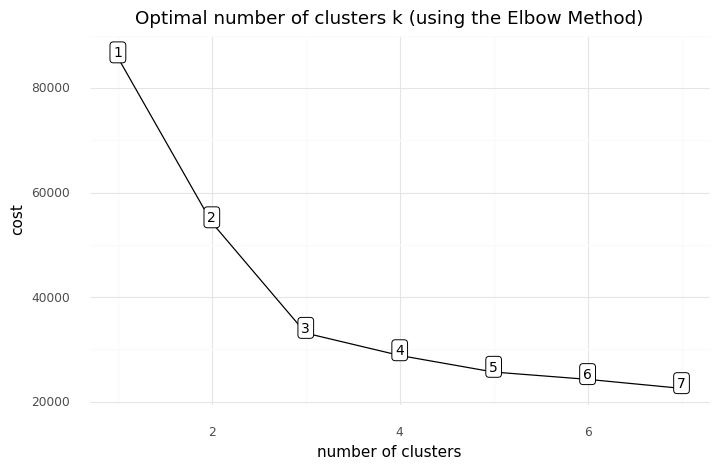

<ggplot: (8775190630382)>

In [22]:
# Import module for data visualization
from plotnine import *
import plotnine

plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of clusters k (using the Elbow Method)')+
    xlab('number of clusters')+
    ylab('cost')+
    theme_minimal()
)

In [52]:
# Fit the cluster
OPTIMAL_K = 4

kprototype = computed_clusters[OPTIMAL_K]

In [53]:
# Cluster centorid
kprototype.cluster_centroids_

array([['0.3946813013868394', '0.028351039523918146',
        '0.6490086335380344', '0.006334728201804526',
        '0.005023554094307349', '0.0063428554153785845',
        '0.002242041527625447', '0.0050398927482109505',
        '0.019654088050314465', '0.024764150943396228',
        '0.5361635220125787', '0.0011792452830188679',
        '0.039865041928721125', '0.3897397710409134',
        '0.40489560911338096', '0.24427588599644695',
        '0.2172880139698317', '0.2742966376055738',
        '0.12092291004717737', '0.16470425969315794',
        '0.180175576519917', '0.3857093608504641', '0.19162735849056603',
        '0.4722877358490566', '0.3131054389490514',
        '0.30770894935698706', '0.15759719839907776',
        '0.29830430346209474', '0.0', '0.27004716981131327',
        '0.15314465408805', '0.18543632075471697', '0.5473644046335562',
        '0.05537528326246388', '0.11175036310169773',
        '0.3198715298777093', '0.2778437959077637',
        '0.00481525157232704', '0

In [54]:
# Check the iteration of the clusters created
kprototype.n_iter_

7

In [55]:
# Check the cost of the clusters created
kprototype.cost_

25674.241759572687

In [57]:
# Add cluster labels to original dataframe
df['cluster'] = kprototype.labels_
df['cluster_cat'] = df['cluster']

# (groupby works only on category type)
df['cluster_cat'] = df['cluster_cat'].astype('category')

In [58]:
df.head()

connection.time  connection.duration  connection.orig_p  \
0          0.55658              0.00000            0.76909   
1          0.62742              0.00000            0.82694   
2          0.02878              0.09723            0.92937   
3          0.63302              0.00000            0.77811   
4          0.18236              0.00000            0.96740   

   connection.orig_bytes  connection.orig_pkts  connection.resp_p  \
0                0.00066               0.00060            0.00050   
1                0.00126               0.00060            0.00050   
2                0.01378               0.00693            0.00093   
3                0.00084               0.00060            0.00050   
4                0.00057               0.00060            0.00050   

   connection.resp_bytes  connection.resp_pkts       orig_p_cat resp_p_cat  \
0                0.00001               0.00055  orig_reg_or_dyn    resp_53   
1                0.00003               0.00055  orig_reg_or_dyn    resp_53   
2                0.00123               0.00683  orig_reg_or_dyn    resp_80   
3                0.00004               0.00055  orig_reg_or_dyn    resp_53   
4                0.00001               0.00055  orig_reg_or_dyn    resp_53   

  protocol service conn_state  dns_count  ssh_count  http_count  ssl_count  \
0      udp     dns         SF    1.00000    0.00000     0.00000    0.00000   
1      udp     dns         SF    1.00000    0.00000     0.00000    0.00000   
2      tcp    http         SF    0.00000    0.00000     1.00000    0.00000   
3      udp     dns         SF    1.00000    0.00000     0.00000    0.00000   
4      udp     dns         SF    1.00000    0.00000     0.00000    0.00000   

   files_count  orig_orig_total  orig_orig_connection.time_mean  \
0      0.00000          0.83551                         0.57641   
1      0.00000          0.87685                         0.58882   
2      0.11111          0.81978                         0.07533   
3      0.00000          0.21079                         0.62154   
4      0.00000          0.92944                         0.10398   

   orig_orig_connection.duration_mean  orig_orig_connection.orig_pkts_mean  \
0                             0.22293                              0.14351   
1                             0.22305                              0.14337   
2                             0.24991                              0.28953   
3                             0.13495                              0.12177   
4                             0.27517                              0.28396   

   orig_orig_connection.orig_bytes_mean  orig_orig_connection.resp_bytes_mean  \
0                               0.29789                               0.04956   
1                               0.29391                               0.04980   
2                               0.38423                               0.22586   
3                               0.18385                               0.03445   
4                               0.37617                               0.20907   

   orig_orig_connection.resp_pkts_mean  orig_orig_orig_p_well_known_count  \
0                              0.10993                            0.03333   
1                              0.11058                            0.06667   
2                              0.24486                            0.06667   
3                              0.08622                            0.03333   
4                              0.23659                            0.06667   

   orig_orig_orig_p_reg_or_dyn_count  orig_orig_resp_p_21_count  \
0                            0.83483                    0.00000   
1                            0.87522                    0.00000   
2                            0.81822                    0.00000   
3                            0.21095                    0.50000   
4                            0.92774                    0.50000   

   orig_orig_resp_p_22_count  orig_orig_resp_p_53_co

In [59]:
df.columns

Index(['connection.time', 'connection.duration', 'connection.orig_p',
       'connection.orig_bytes', 'connection.orig_pkts', 'connection.resp_p',
       'connection.resp_bytes', 'connection.resp_pkts', 'orig_p_cat',
       'resp_p_cat',
       ...
       'resp_resp_similar_ssl_cipher_count',
       'resp_resp_similar_ssl_curve_count',
       'resp_resp_similar_ssl_validation_status_count',
       'resp_resp_similar_files_source_count',
       'resp_resp_similar_file_md5_count',
       'resp_resp_connection.protocol_mode',
       'resp_resp_connection.service_mode',
       'resp_resp_connection.conn_state_mode', 'cluster', 'cluster_cat'],
      dtype='object', length=184)

In [60]:
df['cluster'].value_counts()

1    4314
3    3932
2    3753
4    3365
0    2544
Name: cluster, dtype: int64

## 2. Results

In [61]:
# Cluster interpretation
# (using average for numerical, mode for categorical attributes)

#df.rename(columns = {'cluster':'Total'}, inplace = True)
df.groupby('cluster_cat').agg(
    {
        'cluster':'count',
        'protocol': lambda x: x.value_counts().index[0],
        'service': lambda x: x.value_counts().index[0],
        'conn_state': lambda x: x.value_counts().index[0],
        'orig_p_cat' : lambda x: x.value_counts().index[0],
        'resp_p_cat': lambda x: x.value_counts().index[0],
        'connection.time': 'mean',
        'connection.duration': 'mean',
        'connection.orig_bytes': 'mean', 
        #'connection.orig_ip_bytes': 'mean',
        'connection.orig_pkts': 'mean',
        'connection.resp_bytes': 'mean',
        #'connection.resp_ip_bytes': 'mean',
        'connection.resp_pkts': 'mean',
        'dns_count': 'mean',
        'ssh_count': 'mean',
        'http_count': 'mean',
        'ssl_count': 'mean',
        'files_count': 'mean'
        
    }
).reset_index()

cluster_cat  cluster protocol service conn_state       orig_p_cat  \
0           0     2544      tcp    http         SF  orig_reg_or_dyn   
1           1     4314      udp     dns         SF  orig_reg_or_dyn   
2           2     3753      udp     dns         SF  orig_reg_or_dyn   
3           3     3932      udp     dns         SF  orig_reg_or_dyn   
4           4     3365      tcp     ssl         SF  orig_reg_or_dyn   

  resp_p_cat  connection.time  connection.duration  connection.orig_bytes  \
0    resp_80          0.39468              0.02835                0.00633   
1    resp_53          0.32265              0.00023                0.00076   
2    resp_53          0.42911              0.00020                0.00045   
3    resp_53          0.55651              0.00055                0.00086   
4   resp_443          0.47037              0.05065                0.01252   

   connection.orig_pkts  connection.resp_bytes  connection.resp_pkts  \
0               0.00502                0.00224               0.00504   
1               0.00077                0.00003               0.00062   
2               0.00035                0.00002               0.00029   
3               0.00077                0.00003               0.00063   
4               0.00748                0.00329               0.00763   

   dns_count  ssh_count  http_count  ssl_count  files_count  
0    0.01965    0.02476     0.53616    0.00118      0.03987  
1    0.99305    0.00000     0.00000    0.00000      0.00003  
2    0.99707    0.00000     0.00000    0.00160      0.00007  
3    0.96261    0.00000     0.00000    0.00000      0.00004  
4    0.00000    0.00000     0.00000    0.99138      0.05049

In [62]:
df.groupby('cluster_cat').agg(
    {
        'cluster':'count',
        # responder neighbourhood
        'orig_orig_total': 'mean', 
        'orig_orig_connection.protocol_mode': lambda x: x.value_counts().index[0],
        'orig_orig_connection.service_mode': lambda x: x.value_counts().index[0],
        'orig_orig_connection.conn_state_mode': lambda x: x.value_counts().index[0],
        'orig_orig_connection.time_mean': 'mean',
        'orig_orig_connection.duration_mean': 'mean', 
        'orig_orig_connection.orig_bytes_mean': 'mean', 
        'orig_orig_connection.orig_pkts_mean': 'mean',
        'orig_orig_connection.resp_bytes_mean': 'mean',
        'orig_orig_connection.resp_pkts_mean': 'mean'
    }
).reset_index()

cluster_cat  cluster  orig_orig_total orig_orig_connection.protocol_mode  \
0           0     2544          0.38974                                udp   
1           1     4314          0.69490                                udp   
2           2     3753          0.57462                                udp   
3           3     3932          0.18278                                udp   
4           4     3365          0.39347                                udp   

  orig_orig_connection.service_mode orig_orig_connection.conn_state_mode  \
0                               dns                                   SF   
1                               dns                                   SF   
2                               dns                                   SF   
3                               dns                                   SF   
4                               dns                                   SF   

   orig_orig_connection.time_mean  orig_orig_connection.duration_mean  \
0                         0.40490                             0.24428   
1                         0.33166                             0.24991   
2                         0.43793                             0.00302   
3                         0.56670                             0.27004   
4                         0.47742                             0.29125   

   orig_orig_connection.orig_bytes_mean  orig_orig_connection.orig_pkts_mean  \
0                               0.27430                              0.21729   
1                               0.30384                              0.19528   
2                               0.00354                              0.00179   
3                               0.25301                              0.22316   
4                               0.29424                              0.21525   

   orig_orig_connection.resp_bytes_mean  orig_orig_connection.resp_pkts_mean  
0                               0.12092                              0.16470  
1                               0.10245                              0.15249  
2                               0.00117                              0.00708  
3                               0.11964                              0.16852  
4                               0.10637                              0.16210

In [63]:
pd.DataFrame(kprototype.cluster_centroids_)

0                       1                   2    \
0  0.3946813013868394    0.028351039523918146  0.6490086335380344   
1  0.3226466050201071  0.00022604263643659104  0.8743552989205315   
2  0.4291118895520845  0.00020312654833323784  0.9324920649404471   
3  0.5565115023266465   0.0005472808057314449  0.6708902624156239   
4  0.4703677563241241     0.05064994307249175  0.7192525312348276   

                      3                       4                      5    \
0    0.006334728201804526    0.005023554094307349  0.0063428554153785845   
1   0.0007634319647586706    0.000767599904343413  0.0014339630040457376   
2  0.00044678266033036575  0.00034646185172245586  0.0005200490550807447   
3   0.0008583351250971461    0.000765194008116734   0.002332535876551621   
4    0.012523664514139724    0.007476545921971597  0.0066383719720780904   

                      6                       7                     8    \
0    0.002242041527625447   0.0050398927482109505  0.019654088050314465   
1   2.928152510878124e-05    0.000615438742172944    0.9930458970792768   
2   1.586231572587451e-05  0.00028517371996320277    0.9970690114575007   
3  2.8926114396857964e-05   0.0006328886866784079    0.9626144455747712   
4    0.003290365692988434    0.007634958327815997                   0.0   

                    9                   10                     11   \
0  0.024764150943396228  0.5361635220125787  0.0011792452830188679   
1                   0.0                 0.0                    0.0   
2                   0.0                 0.0  0.0015987210231814548   
3                   0.0                 0.0                    0.0   
4                   0.0                 0.0     0.9913818722139673   

                      12                   13                   14   \
0    0.039865041928721125   0.3897397710409134  0.40489560911338096   
1   3.219492092927418e-05   0.6949024081511509   0.3316588466131529   
2   6.661337596590165e-05   0.5746215312394303   0.4379284347967431   
3  3.5322708262687836e-05  0.18277892715489408   0.5667023885988653   
4    0.050487039788674824  0.39346638395912564  0.47741615114009944   

                     15                     16                    17   \
0    0.24427588599644695     0.2172880139698317    0.2742966376055738   
1    0.24990893955480456    0.19527856272043945   0.30383792740767424   
2  0.0030165926630392986  0.0017939796803308264  0.003541346617552293   
3     0.2700424580140088     0.2231570075223184   0.25301073369534005   
4    0.29124662324720046     0.2152528999593419    0.2942417042608129   

                     18                    19                    20   \
0    0.12092291004717737   0.16470425969315794     0.180175576519917   
1    0.10244586788027453    0.1524869477038128  0.034670066450315985   
2  0.0011671542615325364  0.007082471573182868   0.05855759836575435   
3    0.11963675907196311   0.16852435059797383    0.2065106815869632   
4     0.1063709378292911   0.16209509682064094   0.11385339276869978   

                   21                   22                   23   \
0   0.3857093608504641  0.19162735849056603   0.4722877358490566   
1   0.6943795575176313   0.1454566527584608  0.41226240148354193   
2   0.5736173478930955                  0.0                  0.0   
3  0.17831798564829152  0.22545778229908445  0.46751017293997965   
4    0.391217011105437  0.18826151560178306    0.412630014858841   

                   24                      25                      26   \
0   0.3131054389490514     0.30770894935698706     0.15759719839907776   
1   0.5772795604238632     0.46852619724741884    0.012057993003746253   
2   0.7545833944284405  2.9168129557165053e-17  1.4023665433452155e-16   
3  0.13195823075118304     0.08987156663275926     0.18756126884305535   
4  0.31052111450099784      0.1982901244150711     0.09090368769417707   

                    27   28                   29                      30   \
0   0.29830430346209474  0.0  0.270047169811

In [64]:
centroids = pd.DataFrame(kprototype.cluster_centroids_, columns = [CONN_NUMERICAL_COLS + 
                                                                    # categorical
                                                                    ['orig_p_cat', 
                                                                     'resp_p_cat',
                                                                     'protocol',
                                                                     'service', 
                                                                     'conn_state'] + 
                                                                    CONN_APP_STATS + 

                                                                    # originator neighbourhood
                                                                    ORIG_ORIG_NUMERICAL_COLS + 
                                                                    ORIG_ORIG_PORTS_COLS + 
                                                                    ORIG_ORIG_APP_STATS_COLS + 
                                                                    ORIG_ORIG_SIMILAR_COLS + 
                                                                    # originator categorical neighbourhood 
                                                                    ORIG_ORIG_CATEGORICAL_COLS + 

                                                                    # originator neighbourhood
                                                                    ORIG_RESP_NUMERICAL_COLS + 
                                                                    ORIG_RESP_PORTS_COLS + 
                                                                    ORIG_RESP_APP_STATS_COLS + 
                                                                    ORIG_RESP_SIMILAR_COLS + 
                                                                    # originator categorical neighbourhood 
                                                                    ORIG_RESP_CATEGORICAL_COLS + 

                                                                    # originator neighbourhood
                                                                    RESP_ORIG_NUMERICAL_COLS + 
                                                                    RESP_ORIG_PORTS_COLS + 
                                                                    RESP_ORIG_APP_STATS_COLS + 
                                                                    RESP_ORIG_SIMILAR_COLS + 
                                                                    # originator categorical neighbourhood 
                                                                    RESP_ORIG_CATEGORICAL_COLS + 

                                                                    # originator neighbourhood
                                                                    RESP_RESP_NUMERICAL_COLS + 
                                                                    RESP_RESP_PORTS_COLS + 
                                                                    RESP_RESP_APP_STATS_COLS + 
                                                                    RESP_RESP_SIMILAR_COLS + 
                                                                    # originator categorical neighbourhood 
                                                                    RESP_RESP_CATEGORICAL_COLS])

# https://stackoverflow.com/questions/51148457/how-to-find-the-set-of-influential-features-in-clusters/53081779#53081779
centroids

connection.time     connection.duration   connection.orig_p  \
0  0.3946813013868394    0.028351039523918146  0.6490086335380344   
1  0.3226466050201071  0.00022604263643659104  0.8743552989205315   
2  0.4291118895520845  0.00020312654833323784  0.9324920649404471   
3  0.5565115023266465   0.0005472808057314449  0.6708902624156239   
4  0.4703677563241241     0.05064994307249175  0.7192525312348276   

    connection.orig_bytes    connection.orig_pkts      connection.resp_p  \
0    0.006334728201804526    0.005023554094307349  0.0063428554153785845   
1   0.0007634319647586706    0.000767599904343413  0.0014339630040457376   
2  0.00044678266033036575  0.00034646185172245586  0.0005200490550807447   
3   0.0008583351250971461    0.000765194008116734   0.002332535876551621   
4    0.012523664514139724    0.007476545921971597  0.0066383719720780904   

    connection.resp_bytes    connection.resp_pkts            orig_p_cat  \
0    0.002242041527625447   0.0050398927482109505  0.019654088050314465   
1   2.928152510878124e-05    0.000615438742172944    0.9930458970792768   
2   1.586231572587451e-05  0.00028517371996320277    0.9970690114575007   
3  2.8926114396857964e-05   0.0006328886866784079    0.9626144455747712   
4    0.003290365692988434    0.007634958327815997                   0.0   

             resp_p_cat            protocol                service  \
0  0.024764150943396228  0.5361635220125787  0.0011792452830188679   
1                   0.0                 0.0                    0.0   
2                   0.0                 0.0  0.0015987210231814548   
3                   0.0                 0.0                    0.0   
4                   0.0                 0.0     0.9913818722139673   

               conn_state            dns_count            ssh_count  \
0    0.039865041928721125   0.3897397710409134  0.40489560911338096   
1   3.219492092927418e-05   0.6949024081511509   0.3316588466131529   
2   6.661337596590165e-05   0.5746215312394303   0.4379284347967431   
3  3.5322708262687836e-05  0.18277892715489408   0.5667023885988653   
4    0.050487039788674824  0.39346638395912564  0.47741615114009944   

              http_count              ssl_count           files_count  \
0    0.24427588599644695     0.2172880139698317    0.2742966376055738   
1    0.24990893955480456    0.19527856272043945   0.30383792740767424   
2  0.0030165926630392986  0.0017939796803308264  0.003541346617552293   
3     0.2700424580140088     0.2231570075223184   0.25301073369534005   
4    0.29124662324720046     0.2152528999593419    0.2942417042608129   

         orig_orig_total orig_orig_connection.time_mean  \
0    0.12092291004717737            0.16470425969315794   
1    0.10244586788027453             0.1524869477038128   
2  0.0011671542615325364           0.007082471573182868   
3    0.11963675907196311            0.16852435059797383   
4     0.1063709378292911            0.16209509682064094   

  orig_orig_connection.duration_mean orig_orig_connection.orig_pkts_mean  \
0                  0.180175576519917                  0.3857093608504641   
1               0.034670066450315985                  0.6943795575176313   
2                0.05855759836575435                  0.5736173478930955   
3                 0.2065106815869632                 0.17831798564829152   
4                0.11385339276869978                   0.391217011105437   

  orig_orig_connection.orig_bytes_mean orig_orig_connection.resp_bytes_mean  \
0                  0.19162735849056603                   0.4722877358490566   
1                   0.1454566527584608                  0.41226240148354193   
2                                  0.0                                  0.0   
3                  0.22545778229908445                  0.46751017293997965   
4                  0.18826151560178306                    0.412630014858841   

  orig_orig_connection.resp_pkts_mean orig_orig_orig_p_well_known_count  \
0                  0.3131054389490

In [65]:
from sklearn.decomposition import PCA

data_num_cols = selected_df.filter(CONN_NUMERICAL_COLS + 
                                   # categorical
                                   OHE_ORIG_P_CAT_COLS + 
                                   OHE_RESP_P_CAT_COLS + 
                                   OHE_PROTO_CAT_COLS + 
                                   OHE_SERVICE_CAT_COLS + 
                                   OHE_CONN_STATE_CAT_COLS + 
                                   
                                   CONN_APP_STATS + 
                                   
                                   # originator neighbourhood
                                   ORIG_ORIG_NUMERICAL_COLS + 
                                   ORIG_ORIG_PORTS_COLS + 
                                   ORIG_ORIG_APP_STATS_COLS + 
                                   ORIG_ORIG_SIMILAR_COLS + 
                                   # originator categorical neighbourhood 
                                   ORIG_ORIG_OHE_CAT_COLS + 
                                   
                                   # originator neighbourhood
                                   ORIG_RESP_NUMERICAL_COLS + 
                                   ORIG_RESP_PORTS_COLS + 
                                   ORIG_RESP_APP_STATS_COLS + 
                                   ORIG_RESP_SIMILAR_COLS + 
                                   # originator categorical neighbourhood 
                                   ORIG_RESP_OHE_CAT_COLS + 
                                   
                                   # originator neighbourhood
                                   RESP_ORIG_NUMERICAL_COLS + 
                                   RESP_ORIG_PORTS_COLS + 
                                   RESP_ORIG_APP_STATS_COLS + 
                                   RESP_ORIG_SIMILAR_COLS + 
                                   # originator categorical neighbourhood 
                                   RESP_ORIG_OHE_CAT_COLS + 
                                   
                                   # originator neighbourhood
                                   RESP_RESP_NUMERICAL_COLS + 
                                   RESP_RESP_PORTS_COLS + 
                                   RESP_RESP_APP_STATS_COLS + 
                                   RESP_RESP_SIMILAR_COLS + 
                                   # originator categorical neighbourhood 
                                   RESP_RESP_OHE_CAT_COLS, axis=1)
n_components = len(data_num_cols.columns)
whiten = False
random_state = 2018
pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

In [66]:
pca_X = pca.fit_transform(data_num_cols)
pca_X = pd.DataFrame(data=pca_X)

print(f"Variance Explained by all {n_components} principal components: {sum(pca.explained_variance_ratio_)}")

Variance Explained by all 246 principal components: 0.9999999999999998


In [67]:
importanceOfPrincipalComponents = pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

n_components = [150, 10, 7, 5, 2]

for n in n_components:
    print('Variance Captured by First {:3} Principal Components: {}'.format(n, importanceOfPrincipalComponents.loc[:,0:n+1].sum(axis=1).values))
print('Variance Captured by the First Principal Component:  {}'.format(importanceOfPrincipalComponents.loc[:,0:1].sum(axis=1).values))

Variance Captured by First 150 Principal Components: [1.]
Variance Captured by First  10 Principal Components: [0.93150618]
Variance Captured by First   7 Principal Components: [0.90662513]
Variance Captured by First   5 Principal Components: [0.88301246]
Variance Captured by First   2 Principal Components: [0.8105143]
Variance Captured by the First Principal Component:  [0.7043766]


In [68]:
variance_ratios = pca.explained_variance_ratio_
df_cols = df.columns

for i in range(len(variance_ratios)):
    if round(variance_ratios[i], 8) > 0:
        print('Variance of {:42}: {:.8f}'.format(df_cols[i], variance_ratios[i]))

Variance of connection.time                           : 0.42796692
Variance of connection.duration                       : 0.27640968
Variance of connection.orig_p                         : 0.05992997
Variance of connection.orig_bytes                     : 0.04620773
Variance of connection.orig_pkts                      : 0.03366997
Variance of connection.resp_p                         : 0.02077387
Variance of connection.resp_bytes                     : 0.01805432
Variance of connection.resp_pkts                      : 0.01346818
Variance of orig_p_cat                                : 0.01014449
Variance of resp_p_cat                                : 0.00907319
Variance of protocol                                  : 0.00873167
Variance of service                                   : 0.00707619
Variance of conn_state                                : 0.00601549
Variance of dns_count                                 : 0.00537086
Variance of ssh_count                                 : 0.0041

In [69]:
pca_X['cluster'] = kprototype.labels_
pca_X

0        1        2        3        4        5        6        7  \
0     -2.03701 -0.59327  0.03089 -0.37656 -0.76555  0.05956  0.34464  0.37512   
1     -2.23261 -0.63845 -0.00390 -0.39577 -0.82552  0.08120  0.29136  0.49418   
2      2.35339 -1.02713  2.52116 -0.43934  0.13523  0.10482 -0.18798 -0.25245   
3     -2.21626 -0.65941 -0.21893  0.44666 -0.09469  0.07720 -0.31647 -0.21249   
4     -2.34080 -0.76091  0.47015 -1.03493  0.29152  0.52859 -0.15202 -0.09142   
...        ...      ...      ...      ...      ...      ...      ...      ...   
17903  2.35716 -1.09561  1.65575  1.05571 -0.46312 -0.05172 -0.44162 -0.01567   
17904  2.72288 -1.37471 -0.35067 -1.49513  0.16070  0.53817  0.00530 -0.27698   
17905 -2.22687 -0.76582  0.00745 -0.17674 -0.16772  0.22213 -0.13927  0.12612   
17906 -2.26243 -0.73739  0.12421 -0.23279  0.48738  0.22453 -0.31213 -0.19389   
17907 -2.21793 -0.74082  0.13095 -0.66212 -0.42111  0.28950  0.07739  0.77312   

             8        9       10       11       12       13       14       15  \
0      0.25761 -0.06825  0.11833 -0.02256 -0.09681  0.09368 -0.14122 -0.05516   
1      0.20996 -0.07936  0.13242 -0.12531 -0.26513  0.00132 -0.10814  0.02441   
2      0.06311 -0.31948  0.25359 -0.36183 -0.04295  0.07485  0.01858  0.04862   
3     -0.48281  0.12934 -0.09641  0.08594 -0.12943  0.16720  0.19662 -0.03347   
4     -0.40499  0.23863  0.50721 -0.01056 -0.25704  0.02643  0.05753 -0.02649   
...        ...      ...      ...      ...      ...      ...      ...      ...   
17903 -0.25104 -0.24475  0.02482 -0.21497  0.06290  0.08185 -0.06980  0.01094   
17904 -0.00797 -0.04472  0.56562  0.02429 -0.15039 -0.00537  0.19597 -0.02542   
17905 -0.42323  0.10775 -0.14825  0.15830 -0.15785  0.27937 -0.32560  0.02301   
17906 -0.49617  0.16955 -0.09631  0.07420 -0.09575  0.20555  0.14502  0.06354   
17907 -0.16760  0.18792 -0.03028  0.08708  0.29258 -0.10779  0.08369 -0.00837   

            16       17       18       19       20       21       22       23  \
0     -0.18958 -0.03459  0.18783  0.01839  0.01826 -0.08795  0.08608 -0.03358   
1      0.05766 -0.09420 -0.02728  0.07304 -0.00614 -0.04113  0.04881  0.08705   
2     -0.06011  0.06007 -0.09948  0.02944  0.02390 -0.08236 -0.06225 -0.02016   
3      0.17515 -0.06280  0.05859  0.08635 -0.20546 -0.09537  0.19153  0.13454   
4      0.05977  0.08463 -0.05670  0.08742 -0.05922  0.02977 -0.12405  0.07319   
...        ...      ...      ...      ...      ...      ...      ...      ...   
17903  0.00044 -0.16343  0.01740  0.00216 -0.22728  0.06884 -0.12431 -0.07147   
17904  0.04936 -0.04162  0.08019  0.03657 -0.19732  0.00960 -0.12357 -0.00393   
17905 -0.35537  0.38010 -0.03236 -0.06504  0.26656  0.08001 -0.11555 -0.10235   
17906  0.03979 -0.00123  0.07929  0.05623 -0.02995 -0.03152 -0.14363  0.00887   
17907  0.09304 -0.11939  0.15838  0.08301 -0.08712 -0.03404  0.07411  0.02686   

            24       25       26       27       28       29       30       31  \
0      0.02195  0.05556 -0.08547 -0.03598 -0.07307  0.00600  0.06181 -0.05318   
1      0.12091  0.01290 -0.21407 -0.01484  0.06206  0.01873  0.03728  0.07168   
2      0.02951 -0.06429  0.06923  0.02701 -0.06071  0.05519  0.02845 -0.02891   
3      0.04100 -0.05506 -0.00384 -0.08731  0.07344  0.05472  0.09352  0.04541   
4     -0.06751 -0.06161  0.07377  0.03187 -0.02818 -0.04090  0.14922  0.02916   
...        ...      ...      ...      ...      ...      ...      ...      ...   
17903 -0.09773 -0.01851 -0.18952  0.05057 -0.08342 -0.08210 -0.01494  0.04062   
17904 -0.05297 -0.08068  0.11735  0.01814 -0.02007 -0.01216 -0.00787 -0.08355   
17905 -0.12302  0.07053  0.08051  0.04598 -0.02475 -0.03661 -0.01874  0.07070   
17906 -0.02256 -0.17345  0.22251  0.11449 -0.06425 -0.08164 -0.23064  0.09483   
17907 -0.00636  0.03524 -0.03811 -0.02619 -0.01266  0.01055  0.02284 -0.06675   

            32       33       34       35       36       37       38       39  \
0     -0.10459  0.00120  0.02548  0.0203

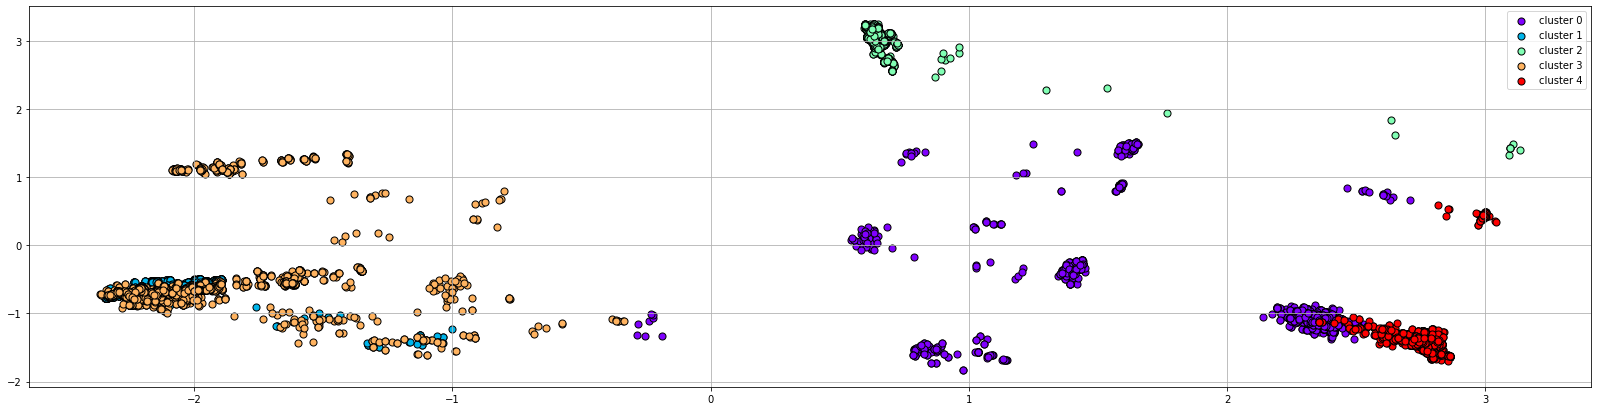

In [70]:
import matplotlib.pyplot as plt
import matplotlib.cm as mcm
import numpy as np

pca_X_array = np.array(pca_X)

colors = mcm.rainbow(np.linspace(0, 1, OPTIMAL_K + 1))

# plot the clusters
for i in range(OPTIMAL_K + 1):   
    plt.scatter(
        pca_X_array[kprototype.labels_ == i, 0], pca_X_array[kprototype.labels_ == i, 1],
        s=50, c=[colors[i]], # warning if not array
        marker='o', edgecolor='black',
        label='cluster ' + str(i)
    )

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [71]:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def subplot_3d_viz(fig, azim, elev, col_i):
    ax = fig.add_subplot(1, 3, col_i, projection='3d')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax.azim = azim  # default -60
    ax.elev = elev  # default 30

    for i in pca_X['cluster'].unique(): 
        ax.scatter(pca_X_array[kprototype.labels_ == i, 0], 
                   pca_X_array[kprototype.labels_ == i, 1], 
                   pca_X_array[kprototype.labels_ == i, 2], 
                   c=[colors[i]],
                   edgecolor='black',
                   label='cluster ' + str(i));

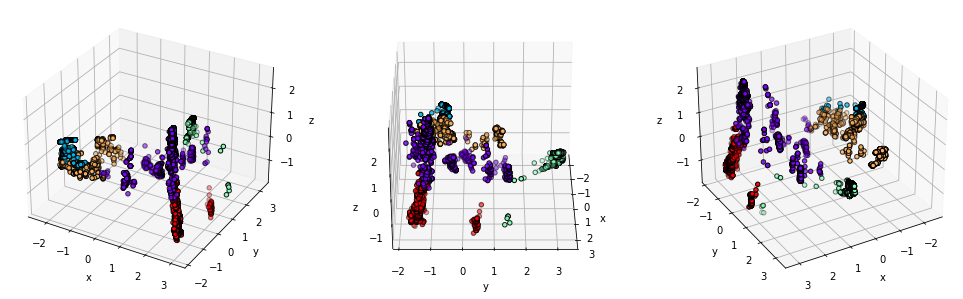

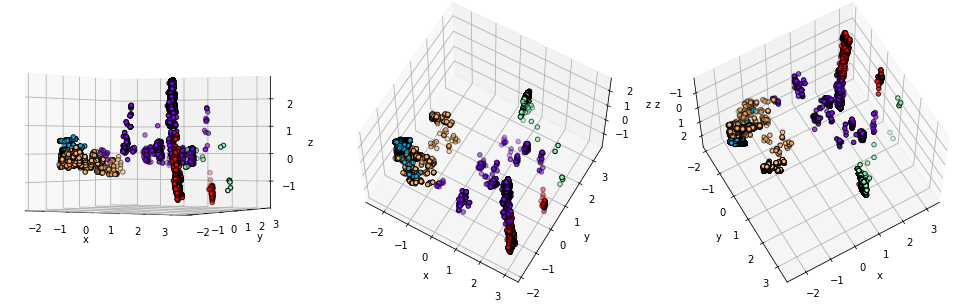

In [72]:
azims = [-60, 0, 60]
elevs = [0, 60, 240]

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(azims)):
    subplot_3d_viz(fig, azims[i], 30, i+1)

plt.show()

fig = plt.figure(figsize=(17,19))
fig.tight_layout()

for i in range(len(elevs)):
    subplot_3d_viz(fig, -60, elevs[i], i+1)

plt.show()

In [73]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'attacker_label', 'victim_label']

In [74]:
# join dfs
labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)
result

0        1        2        3        4        5        6        7  \
0     -2.03701 -0.59327  0.03089 -0.37656 -0.76555  0.05956  0.34464  0.37512   
1     -2.23261 -0.63845 -0.00390 -0.39577 -0.82552  0.08120  0.29136  0.49418   
2      2.35339 -1.02713  2.52116 -0.43934  0.13523  0.10482 -0.18798 -0.25245   
3     -2.21626 -0.65941 -0.21893  0.44666 -0.09469  0.07720 -0.31647 -0.21249   
4     -2.34080 -0.76091  0.47015 -1.03493  0.29152  0.52859 -0.15202 -0.09142   
...        ...      ...      ...      ...      ...      ...      ...      ...   
17903  2.35716 -1.09561  1.65575  1.05571 -0.46312 -0.05172 -0.44162 -0.01567   
17904  2.72288 -1.37471 -0.35067 -1.49513  0.16070  0.53817  0.00530 -0.27698   
17905 -2.22687 -0.76582  0.00745 -0.17674 -0.16772  0.22213 -0.13927  0.12612   
17906 -2.26243 -0.73739  0.12421 -0.23279  0.48738  0.22453 -0.31213 -0.19389   
17907 -2.21793 -0.74082  0.13095 -0.66212 -0.42111  0.28950  0.07739  0.77312   

             8        9       10       11       12       13       14       15  \
0      0.25761 -0.06825  0.11833 -0.02256 -0.09681  0.09368 -0.14122 -0.05516   
1      0.20996 -0.07936  0.13242 -0.12531 -0.26513  0.00132 -0.10814  0.02441   
2      0.06311 -0.31948  0.25359 -0.36183 -0.04295  0.07485  0.01858  0.04862   
3     -0.48281  0.12934 -0.09641  0.08594 -0.12943  0.16720  0.19662 -0.03347   
4     -0.40499  0.23863  0.50721 -0.01056 -0.25704  0.02643  0.05753 -0.02649   
...        ...      ...      ...      ...      ...      ...      ...      ...   
17903 -0.25104 -0.24475  0.02482 -0.21497  0.06290  0.08185 -0.06980  0.01094   
17904 -0.00797 -0.04472  0.56562  0.02429 -0.15039 -0.00537  0.19597 -0.02542   
17905 -0.42323  0.10775 -0.14825  0.15830 -0.15785  0.27937 -0.32560  0.02301   
17906 -0.49617  0.16955 -0.09631  0.07420 -0.09575  0.20555  0.14502  0.06354   
17907 -0.16760  0.18792 -0.03028  0.08708  0.29258 -0.10779  0.08369 -0.00837   

            16       17       18       19       20       21       22       23  \
0     -0.18958 -0.03459  0.18783  0.01839  0.01826 -0.08795  0.08608 -0.03358   
1      0.05766 -0.09420 -0.02728  0.07304 -0.00614 -0.04113  0.04881  0.08705   
2     -0.06011  0.06007 -0.09948  0.02944  0.02390 -0.08236 -0.06225 -0.02016   
3      0.17515 -0.06280  0.05859  0.08635 -0.20546 -0.09537  0.19153  0.13454   
4      0.05977  0.08463 -0.05670  0.08742 -0.05922  0.02977 -0.12405  0.07319   
...        ...      ...      ...      ...      ...      ...      ...      ...   
17903  0.00044 -0.16343  0.01740  0.00216 -0.22728  0.06884 -0.12431 -0.07147   
17904  0.04936 -0.04162  0.08019  0.03657 -0.19732  0.00960 -0.12357 -0.00393   
17905 -0.35537  0.38010 -0.03236 -0.06504  0.26656  0.08001 -0.11555 -0.10235   
17906  0.03979 -0.00123  0.07929  0.05623 -0.02995 -0.03152 -0.14363  0.00887   
17907  0.09304 -0.11939  0.15838  0.08301 -0.08712 -0.03404  0.07411  0.02686   

            24       25       26       27       28       29       30       31  \
0      0.02195  0.05556 -0.08547 -0.03598 -0.07307  0.00600  0.06181 -0.05318   
1      0.12091  0.01290 -0.21407 -0.01484  0.06206  0.01873  0.03728  0.07168   
2      0.02951 -0.06429  0.06923  0.02701 -0.06071  0.05519  0.02845 -0.02891   
3      0.04100 -0.05506 -0.00384 -0.08731  0.07344  0.05472  0.09352  0.04541   
4     -0.06751 -0.06161  0.07377  0.03187 -0.02818 -0.04090  0.14922  0.02916   
...        ...      ...      ...      ...      ...      ...      ...      ...   
17903 -0.09773 -0.01851 -0.18952  0.05057 -0.08342 -0.08210 -0.01494  0.04062   
17904 -0.05297 -0.08068  0.11735  0.01814 -0.02007 -0.01216 -0.00787 -0.08355   
17905 -0.12302  0.07053  0.08051  0.04598 -0.02475 -0.03661 -0.01874  0.07070   
17906 -0.02256 -0.17345  0.22251  0.11449 -0.06425 -0.08164 -0.23064  0.09483   
17907 -0.00636  0.03524 -0.03811 -0.02619 -0.01266  0.01055  0.02284 -0.06675   

            32       33       34       35       36       37       38       39  \
0     -0.10459  0.00120  0.02548  0.0203

In [76]:
def print_df_func(df, col, func):
    if func == 'count':
        print(df[col].value_counts())
        print('')
    elif func == 'mean':
        col_mean = df[col].mean()
        print(str(col) + ' mean = ' + str(col_mean))
    elif func == 'median':
        col_median = df[col].median()
        print(str(col) + ' median = ' + str(col_median))
    elif func == 'min':
        col_min = df[col].min()
        print(str(col) + ' min = ' + str(col_min))
    elif func == 'max':
        col_max = df[col].max()
        print(str(col) + ' max = ' + str(col_max))
        print('')

In [77]:
plt.rcParams["figure.figsize"] = (10,7)

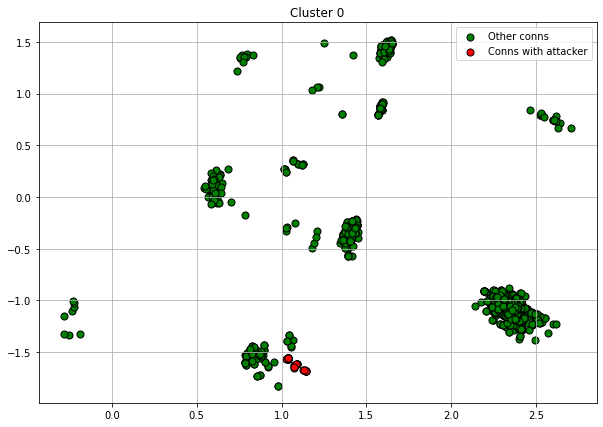

Total num of conns: 2544

Attacker conns ratio:
No     2510
Yes      34
Name: attacker_label, dtype: int64

IPs:
192.168.10.14    678
192.168.10.8     356
192.168.10.12    278
192.168.10.15    212
192.168.10.17    181
192.168.10.19    166
192.168.10.5     166
192.168.10.16    154
192.168.10.9     111
192.168.10.25     82
192.168.10.51     79
192.168.10.50     47
172.16.0.1        34
Name: originated_ip, dtype: int64

23.50.75.27       255
178.255.83.1      153
72.21.91.29       133
192.168.10.50     127
72.167.239.239     97
                 ... 
54.192.38.6         1
23.206.168.52       1
54.84.24.27         1
182.22.24.252       1
23.194.141.104      1
Name: responded_ip, Length: 460, dtype: int64

Cluster 0 NOK sample connections:


originated_ip_num originated_ip  responded_ip_num   responded_ip  \
16164            0.00000    172.16.0.1           0.75070  192.168.10.50   
10650            0.00000    172.16.0.1           0.75070  192.168.10.50   
8466             0.00000    172.16.0.1           0.75070  192.168.10.50   
16202            0.00000    172.16.0.1           0.75070  192.168.10.50   
722              0.00000    172.16.0.1           0.75070  192.168.10.50   
14821            0.00000    172.16.0.1           0.75070  192.168.10.50   
8494             0.00000    172.16.0.1           0.75070  192.168.10.50   
7691             0.00000    172.16.0.1           0.75070  192.168.10.50   
13470            0.00000    172.16.0.1           0.75070  192.168.10.50   
5567             0.00000    172.16.0.1           0.75070  192.168.10.50   
1980             0.00000    172.16.0.1           0.75070  192.168.10.50   
5416             0.00000    172.16.0.1           0.75070  192.168.10.50   
10830            0.00000    172.16.0.1           0.75070  192.168.10.50   
9644             0.00000    172.16.0.1           0.75070  192.168.10.50   
13867            0.00000    172.16.0.1           0.75070  192.168.10.50   

                         timestamp  connection.time  duration  \
16164  2017-07-06T13:35:04.459614Z          0.00247   5.46995   
10650  2017-07-06T13:42:50.310628Z          0.26141   5.00955   
8466   2017-07-06T13:35:21.109336Z          0.01173   0.23177   
16202  2017-07-06T13:35:04.927532Z          0.00273   0.00022   
722    2017-07-06T13:40:22.024349Z          0.17899   5.03926   
14821  2017-07-06T13:42:45.285885Z          0.25862   5.01739   
8494   2017-07-06T13:35:17.325048Z          0.00962   4.01611   
7691   2017-07-06T13:35:03.204865Z          0.00177   5.72419   
13470  2017-07-06T13:35:33.801349Z          0.01878   5.00156   
5567   2017-07-06T13:41:54.064531Z          0.23015   5.01260   
1980    2017-07-06T13:35:08.30013Z          0.00461   5.63018   
5416    2017-07-06T13:35:45.73295Z          0.02541   6.55325   
10830  2017-07-06T13:41:20.992304Z          0.21177   5.00963   
9644    2017-07-06T13:35:12.14225Z          0.00674   5.78874   
13867  2017-07-06T13:42:12.265347Z          0.24027   5.00555   

       connection.duration protocol service conn_state  connection.orig_p  \
16164              0.00457      tcp    none         SF            0.54911   
10650              0.00419      tcp    http         SF            0.55277   
8466               0.00019      tcp    none         SF            0.55176   
16202              0.00000      tcp    none         SF            0.54828   
722                0.00421      tcp    http         SF            0.55210   
14821              0.00419      tcp    http         SF            0.55274   
8494               0.00336      tcp    none         SF            0.55115   
7691               0.00478      tcp    none         SF            0.54889   
13470              0.00418      tcp    none         SF            0.55188   
5567               0.00419      tcp    http         SF            0.55228   
1980               0.00470      tcp    none         SF            0.54972   
5416               0.00547      tcp    http         SF            0.55195   
10830              0.00419      tcp    http         SF            0.55219   
9644               0.00484      tcp    none         SF            0.55033   
13867              0.00418      tcp    http         SF            0.55231   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
16164   36004  orig_reg_or_dyn                0.00000        0   
10650   36244  orig_reg_or_dyn                0.00420      599   
8466    36178  orig_reg_or_dyn                0.00000        0   
16202   35950  orig_reg_or_dyn                0.00000        0   
722     36200  orig_reg_or_dyn                0.00376      537   
14821   36242  orig_reg_or_dyn                0.00420      599   
8494    36138  orig_reg_or_dyn                0.00000        0   
7691

Cluster 0 OK sample connections:


originated_ip_num  originated_ip  responded_ip_num     responded_ip  \
3160             1.00000  192.168.10.14           0.75580   193.243.130.87   
15706            1.00000  192.168.10.14           0.19841      52.84.40.52   
8617             1.00000  192.168.10.12           0.08376      23.50.75.27   
17785            1.00000  192.168.10.17           0.56255  144.217.252.208   
11409            1.00000  192.168.10.17           0.77848  199.182.221.110   
14754            1.00000  192.168.10.17           0.35352    91.189.89.198   
9932             1.00000  192.168.10.14           0.19796    52.54.195.143   
16830            1.00000  192.168.10.14           0.08376      23.50.75.27   
16003            1.00000  192.168.10.14           0.27592      72.5.205.29   
12812            1.00000  192.168.10.15           0.40202    104.16.27.216   
236              1.00000   192.168.10.8           0.27841   72.167.239.239   
4040             1.00000  192.168.10.16           0.25947   67.215.197.149   
16380            1.00000  192.168.10.14           0.26113    68.67.178.137   
14088            1.00000   192.168.10.8           0.08597    23.194.109.66   
5880             1.00000  192.168.10.50           0.49836  128.138.141.172   

                         timestamp  connection.time  duration  \
3160   2017-07-06T13:53:52.918858Z          0.62972   0.21538   
15706  2017-07-06T13:53:54.259819Z          0.63047  42.49657   
8617    2017-07-06T14:01:28.37799Z          0.88289   5.98258   
17785  2017-07-06T13:43:51.035758Z          0.29517   0.01651   
11409  2017-07-06T13:57:24.035512Z          0.74707   0.07191   
14754  2017-07-06T14:01:57.035582Z          0.89882   0.09412   
9932    2017-07-06T13:40:27.86384Z          0.18224  61.25464   
16830  2017-07-06T13:53:55.406041Z          0.63111  41.34981   
16003  2017-07-06T13:35:54.881756Z          0.03050   5.60322   
12812  2017-07-06T13:49:10.819013Z          0.47292  52.43236   
236    2017-07-06T13:51:38.789557Z          0.55517   0.08009   
4040   2017-07-06T13:49:37.076655Z          0.48751   0.02427   
16380  2017-07-06T13:37:00.667205Z          0.06707  10.44061   
14088  2017-07-06T13:48:55.277974Z          0.46428   5.14283   
5880   2017-07-06T14:03:47.449694Z          0.96019   0.05955   

       connection.duration protocol service conn_state  connection.orig_p  \
3160               0.00018      tcp    http         SF            0.94124   
15706              0.03550      tcp    http       RSTO            0.94210   
8617               0.00500      tcp    none         SF            0.50131   
17785              0.00001      udp     ntp         SF            0.00124   
11409              0.00006      udp     ntp         SF            0.00124   
14754              0.00008      udp     ntp         SF            0.00124   
9932               0.05117      tcp    http         SF            0.93715   
16830              0.03454      tcp    http       RSTO            0.94244   
16003              0.00468      tcp    none         SF            0.93187   
12812              0.04380      tcp    http         SF            0.82401   
236                0.00007      tcp    http         SF            0.77150   
4040               0.00002      udp     ntp         SF            0.00124   
16380              0.00872      tcp    http         SF            0.93498   
14088              0.00430      tcp    none         SF            0.76851   
5880               0.00005      udp     ntp         SF            0.00124   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
3160    61686  orig_reg_or_dyn                0.00777     1108   
15706   61742  orig_reg_or_dyn                0.00307      438   
8617    32874  orig_reg_or_dyn                0.00000        0   
17785     123  orig_well_known                0.00034       48   
11409     123  orig_well_known                0.00034       48   
14754     123  orig_well_known                0.00034       48   
9932    61418  orig_re

Protocol:
tcp    2100
udp     444
Name: protocol, dtype: int64

Service:
http                  1351
none                   665
ntp                    374
ssh                     63
dns                     50
ftp                     15
ftp-data                15
gssapi,smb,dce_rpc       8
ssl                      3
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    2123
orig_well_known     421
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_80            1849
resp_123            374
resp_443            145
resp_well_known      65
resp_22              63
resp_reg             25
resp_21              15
resp_dyn              8
Name: resp_p_cat, dtype: int64




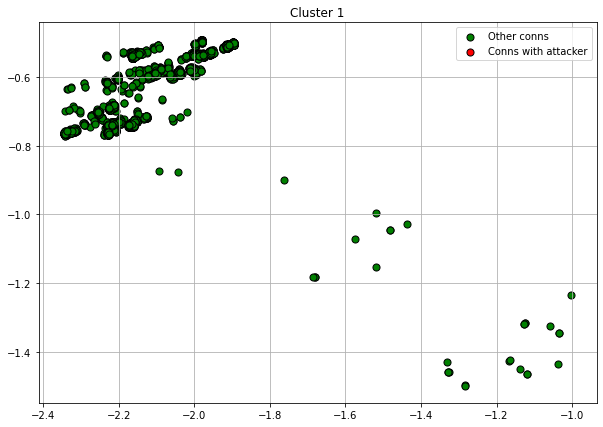

Total num of conns: 4314

Attacker conns ratio:
No    4314
Name: attacker_label, dtype: int64

IPs:
192.168.10.8     1836
192.168.10.14    1295
192.168.10.15    1183
Name: originated_ip, dtype: int64

192.168.10.3    4314
Name: responded_ip, dtype: int64

Cluster 1 OK sample connections:


originated_ip_num  originated_ip  responded_ip_num  responded_ip  \
8568             1.00000   192.168.10.8           0.75070  192.168.10.3   
2787             1.00000  192.168.10.14           0.75070  192.168.10.3   
3548             1.00000   192.168.10.8           0.75070  192.168.10.3   
2871             1.00000   192.168.10.8           0.75070  192.168.10.3   
14384            1.00000  192.168.10.15           0.75070  192.168.10.3   
7765             1.00000   192.168.10.8           0.75070  192.168.10.3   
17405            1.00000  192.168.10.14           0.75070  192.168.10.3   
15114            1.00000  192.168.10.14           0.75070  192.168.10.3   
7885             1.00000   192.168.10.8           0.75070  192.168.10.3   
1404             1.00000  192.168.10.14           0.75070  192.168.10.3   
313              1.00000   192.168.10.8           0.75070  192.168.10.3   
13261            1.00000  192.168.10.15           0.75070  192.168.10.3   
10407            1.00000   192.168.10.8           0.75070  192.168.10.3   
14164            1.00000  192.168.10.15           0.75070  192.168.10.3   
4711             1.00000  192.168.10.15           0.75070  192.168.10.3   

                         timestamp  connection.time  duration  \
8568   2017-07-06T13:51:41.840345Z          0.55686   0.00017   
2787   2017-07-06T13:37:00.852907Z          0.06717   0.00018   
3548   2017-07-06T13:49:06.524923Z          0.47053   0.00014   
2871   2017-07-06T13:43:38.294742Z          0.28809   0.00021   
14384  2017-07-06T13:41:27.956683Z          0.21564   0.13765   
7765   2017-07-06T13:43:40.410664Z          0.28926   0.00097   
17405  2017-07-06T13:35:53.182791Z          0.02955   0.00017   
15114  2017-07-06T13:35:51.501825Z          0.02862   0.00025   
7885   2017-07-06T13:43:36.717798Z          0.28721   0.03189   
1404   2017-07-06T13:37:13.071556Z          0.07396   0.00017   
313      2017-07-06T13:51:42.4763Z          0.55722   0.04792   
13261  2017-07-06T13:45:47.881682Z          0.36012   0.09155   
10407  2017-07-06T13:54:20.139985Z          0.64485   0.00018   
14164  2017-07-06T13:45:27.238232Z          0.34864   0.03111   
4711   2017-07-06T13:45:55.860541Z          0.36455   0.06199   

       connection.duration protocol service conn_state  connection.orig_p  \
8568               0.00000      udp     dns         SF            0.97001   
2787               0.00000      udp     dns         SF            0.94402   
3548               0.00000      udp     dns         SF            0.93346   
2871               0.00000      udp     dns         SF            0.80169   
14384              0.00011      udp     dns         SF            0.94294   
7765               0.00000      udp     dns         SF            0.99939   
17405              0.00000      udp     dns         SF            0.96210   
15114              0.00000      udp     dns         SF            0.75632   
7885               0.00003      udp     dns         SF            0.76182   
1404               0.00000      udp     dns         SF            0.82813   
313                0.00004      udp     dns         SF            0.79823   
13261              0.00008      udp     dns         SF            0.99490   
10407              0.00000      udp     dns         SF            0.81873   
14164              0.00003      udp     dns         SF            0.90353   
4711               0.00005      udp     dns         SF            0.88608   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
8568    63570  orig_reg_or_dyn                0.00055       78   
2787    61868  orig_reg_or_dyn                0.00049       70   
3548    61176  orig_reg_or_dyn                0.00045       64   
2871    52546  orig_reg_or_dyn                0.00056       80   
14384   61797  orig_reg_or_dyn                0.00112      160   
7765    65494  orig_reg_or_dyn                0.00048       68   
17405   63052  orig_reg_or_dyn                0.00053       76   
1511

Protocol:
udp    4294
tcp      20
Name: protocol, dtype: int64

Service:
dns                4285
none                 13
dce_rpc               9
gssapi,smb,krb        4
ntp                   2
gssapi,ntlm,smb       1
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    4309
orig_well_known       5
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53            4282
resp_well_known      25
resp_dyn              5
resp_123              2
Name: resp_p_cat, dtype: int64




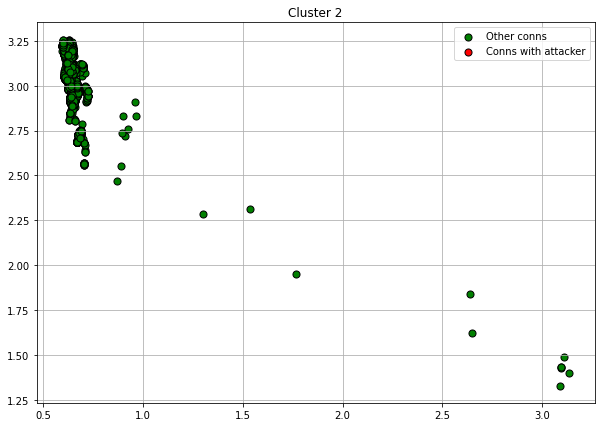

Total num of conns: 3753

Attacker conns ratio:
No    3753
Name: attacker_label, dtype: int64

IPs:
192.168.10.3    3753
Name: originated_ip, dtype: int64

192.168.10.1      3734
192.168.10.255      10
40.70.221.249        2
65.55.44.109         1
65.52.108.231        1
65.52.108.189        1
65.52.108.254        1
131.253.61.66        1
65.52.108.185        1
224.0.1.24           1
Name: responded_ip, dtype: int64

Cluster 2 OK sample connections:


originated_ip_num originated_ip  responded_ip_num  responded_ip  \
11314            1.00000  192.168.10.3           0.75070  192.168.10.1   
12622            1.00000  192.168.10.3           0.75070  192.168.10.1   
6582             1.00000  192.168.10.3           0.75070  192.168.10.1   
9835             1.00000  192.168.10.3           0.75070  192.168.10.1   
14333            1.00000  192.168.10.3           0.75070  192.168.10.1   
13461            1.00000  192.168.10.3           0.75070  192.168.10.1   
11554            1.00000  192.168.10.3           0.75070  192.168.10.1   
2882             1.00000  192.168.10.3           0.75070  192.168.10.1   
15062            1.00000  192.168.10.3           0.75070  192.168.10.1   
13312            1.00000  192.168.10.3           0.75070  192.168.10.1   
16573            1.00000  192.168.10.3           0.75070  192.168.10.1   
10152            1.00000  192.168.10.3           0.75070  192.168.10.1   
2866             1.00000  192.168.10.3           0.75070  192.168.10.1   
17462            1.00000  192.168.10.3           0.75070  192.168.10.1   
4580             1.00000  192.168.10.3           0.75070  192.168.10.1   

                         timestamp  connection.time  duration  \
11314  2017-07-06T13:59:44.415145Z          0.82510   0.00044   
12622  2017-07-06T13:58:55.697337Z          0.79802   0.00063   
6582   2017-07-06T13:39:30.861224Z          0.15055   0.00056   
9835   2017-07-06T13:43:35.629494Z          0.28660   0.03054   
14333  2017-07-06T13:49:10.404169Z          0.47269   0.03076   
13461  2017-07-06T13:35:52.111053Z          0.02896   0.03089   
11554  2017-07-06T13:35:54.719818Z          0.03041   0.03056   
2882   2017-07-06T13:36:31.770533Z          0.05100   0.00064   
15062  2017-07-06T13:39:30.894203Z          0.15057   0.03100   
13312  2017-07-06T13:36:12.522813Z          0.04030   0.03039   
16573  2017-07-06T13:49:45.768308Z          0.49235   0.02442   
10152  2017-07-06T13:55:32.366724Z          0.68500   0.03120   
2866   2017-07-06T13:53:58.946567Z          0.63307   0.03046   
17462  2017-07-06T13:45:27.519923Z          0.34880   0.03043   
4580     2017-07-06T13:51:47.0003Z          0.55973   0.02326   

       connection.duration protocol service conn_state  connection.orig_p  \
11314              0.00000      udp     dns         SF            0.94326   
12622              0.00000      udp     dns         SF            0.91675   
6582               0.00000      udp     dns         SF            0.94419   
9835               0.00003      udp     dns         SF            0.94103   
14333              0.00003      udp     dns         SF            0.92547   
13461              0.00003      udp     dns         SF            0.92165   
11554              0.00003      udp     dns         SF            0.93291   
2882               0.00000      udp     dns         SF            0.92494   
15062              0.00003      udp     dns         SF            0.94505   
13312              0.00003      udp     dns         SF            0.93622   
16573              0.00002      udp     dns         SF            0.92904   
10152              0.00003      udp     dns         SF            0.95041   
2866               0.00003      udp     dns         SF            0.92489   
17462              0.00003      udp     dns         SF            0.94755   
4580               0.00002      udp     dns         SF            0.93077   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
11314   61818  orig_reg_or_dyn                0.00031       44   
12622   60082  orig_reg_or_dyn                0.00036       51   
6582    61879  orig_reg_or_dyn                0.00036       51   
9835    61672  orig_reg_or_dyn                0.00036       51   
14333   60653  orig_reg_or_dyn                0.00033       47   
13461   60403  orig_reg_or_dyn                0.00048       69   
11554   61140  orig_reg_or_dyn                0.00033       47   
2882    60618  orig_

Protocol:
udp    3745
tcp       8
Name: protocol, dtype: int64

Service:
dns     3742
ssl        6
none       5
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    3742
orig_well_known      11
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53            3734
resp_well_known      11
resp_443              8
Name: resp_p_cat, dtype: int64




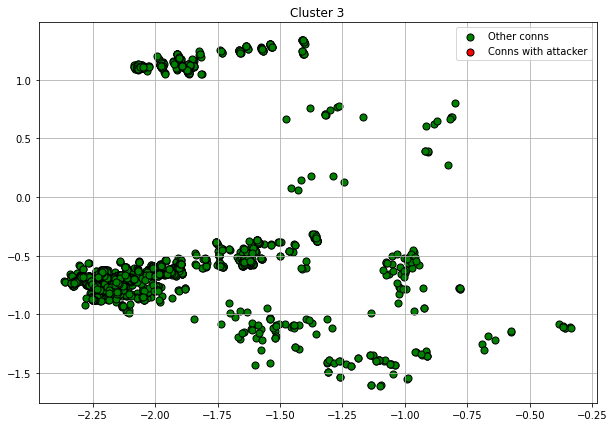

Total num of conns: 3932

Attacker conns ratio:
No    3932
Name: attacker_label, dtype: int64

IPs:
192.168.10.12    831
192.168.10.5     616
192.168.10.9     558
192.168.10.19    385
192.168.10.14    366
192.168.10.16    344
192.168.10.51    249
192.168.10.17    233
192.168.10.8     193
192.168.10.25     77
192.168.10.15     67
192.168.10.50     13
Name: originated_ip, dtype: int64

192.168.10.3     3890
192.168.10.19      42
Name: responded_ip, dtype: int64

Cluster 3 OK sample connections:


originated_ip_num  originated_ip  responded_ip_num  responded_ip  \
8694             1.00000   192.168.10.9           0.75070  192.168.10.3   
7433             1.00000   192.168.10.8           0.75070  192.168.10.3   
8785             1.00000  192.168.10.12           0.75070  192.168.10.3   
10985            1.00000  192.168.10.12           0.75070  192.168.10.3   
4893             1.00000  192.168.10.12           0.75070  192.168.10.3   
12233            1.00000  192.168.10.12           0.75070  192.168.10.3   
3866             1.00000   192.168.10.9           0.75070  192.168.10.3   
2601             1.00000   192.168.10.8           0.75070  192.168.10.3   
8808             1.00000  192.168.10.12           0.75070  192.168.10.3   
10788            1.00000  192.168.10.12           0.75070  192.168.10.3   
6565             1.00000   192.168.10.9           0.75070  192.168.10.3   
10962            1.00000  192.168.10.14           0.75070  192.168.10.3   
1645             1.00000  192.168.10.17           0.75070  192.168.10.3   
13848            1.00000  192.168.10.14           0.75070  192.168.10.3   
9152             1.00000  192.168.10.14           0.75070  192.168.10.3   

                         timestamp  connection.time  duration  \
8694   2017-07-06T13:58:51.888157Z          0.79591   0.06692   
7433   2017-07-06T14:01:40.956563Z          0.88988   0.00020   
8785    2017-07-06T13:50:10.25458Z          0.50596   0.00045   
10985  2017-07-06T13:49:09.894613Z          0.47241   0.00021   
4893   2017-07-06T13:44:19.243485Z          0.31085   0.06286   
12233  2017-07-06T13:51:43.529081Z          0.55780   0.00021   
3866    2017-07-06T13:52:03.43804Z          0.56887   0.00018   
2601   2017-07-06T14:02:24.267117Z          0.91396   0.07941   
8808     2017-07-06T13:41:59.2396Z          0.23303   0.03129   
10788  2017-07-06T13:41:56.899376Z          0.23173   0.00027   
6565   2017-07-06T13:58:50.452884Z          0.79511   0.05113   
10962  2017-07-06T13:51:26.619399Z          0.54840   0.00020   
1645   2017-07-06T14:04:47.259309Z          0.99344   0.00018   
13848  2017-07-06T13:53:58.913373Z          0.63306   0.00017   
9152   2017-07-06T14:02:52.772018Z          0.92980   0.05024   

       connection.duration protocol service conn_state  connection.orig_p  \
8694               0.00006      udp     dns         SF            0.82065   
7433               0.00000      udp     dns         SF            0.88731   
8785               0.00000      udp     dns         SF            0.67448   
10985              0.00000      udp     dns         SF            0.26180   
4893               0.00005      udp     dns         SF            0.72058   
12233              0.00000      udp     dns         SF            0.32607   
3866               0.00000      udp     dns         SF            0.86704   
2601               0.00007      udp     dns         SF            0.99418   
8808               0.00003      udp     dns         SF            0.66462   
10788              0.00000      udp     dns         SF            0.12617   
6565               0.00004      udp     dns         SF            0.93741   
10962              0.00000      udp     dns         SF            0.78179   
1645               0.00000      udp     dns         SF            0.47242   
13848              0.00000      udp     dns         SF            0.94751   
9152               0.00004      udp     dns         SF            0.99603   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
8694    53788  orig_reg_or_dyn                0.00036       52   
7433    58154  orig_reg_or_dyn                0.00109      156   
8785    44215  orig_reg_or_dyn                0.00053       76   
10985   17188  orig_reg_or_dyn                0.00053       76   
4893    47234  orig_reg_or_dyn                0.00042       60   
12233   21397  orig_reg_or_dyn                0.00042       60   
3866    56826  orig_reg_or_dyn                0.00046       66   
2601

Protocol:
udp    3864
tcp      68
Name: protocol, dtype: int64

Service:
dns                   3793
none                    51
ntp                     42
dce_rpc                 15
krb                     13
krb_tcp                  8
gssapi,smb,krb           7
gssapi,smb,dce_rpc       2
gssapi,ntlm,smb          1
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    3851
orig_well_known      81
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_53            3744
resp_well_known     127
resp_123             42
resp_reg             11
resp_dyn              8
Name: resp_p_cat, dtype: int64




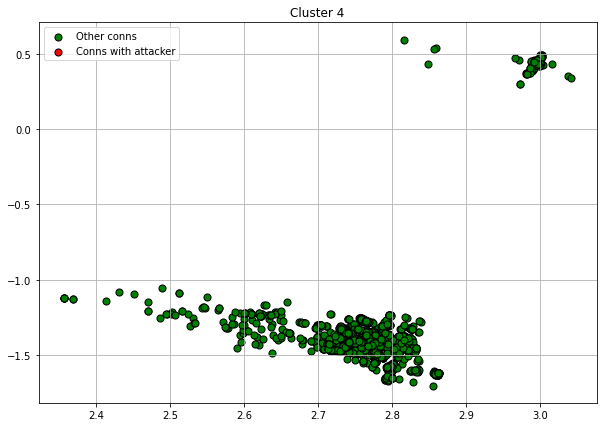

Total num of conns: 3365

Attacker conns ratio:
No    3365
Name: attacker_label, dtype: int64

IPs:
192.168.10.8     815
192.168.10.12    539
192.168.10.15    536
192.168.10.14    326
192.168.10.9     279
192.168.10.51    249
192.168.10.5     244
192.168.10.16    130
192.168.10.19    104
192.168.10.17     75
192.168.10.25     68
Name: originated_ip, dtype: int64

87.106.49.27       73
162.213.33.50      56
74.117.200.68      42
172.217.10.66      32
23.208.107.53      27
                   ..
104.25.104.17       1
205.251.251.224     1
54.230.51.65        1
52.207.196.27       1
23.194.141.104      1
Name: responded_ip, Length: 1063, dtype: int64

Cluster 4 OK sample connections:


originated_ip_num  originated_ip  responded_ip_num     responded_ip  \
5134             1.00000   192.168.10.5           0.72314   185.167.164.41   
550              1.00000   192.168.10.5           0.12976   34.226.151.189   
37               1.00000  192.168.10.14           0.75187   192.243.250.36   
7875             1.00000  192.168.10.12           0.54047    139.61.74.125   
4484             1.00000  192.168.10.12           0.19803    52.59.111.168   
14003            1.00000   192.168.10.8           0.71392   183.79.250.251   
8427             1.00000  192.168.10.16           0.40210    104.20.255.41   
3736             1.00000  192.168.10.12           0.77530  198.232.125.113   
8236             1.00000  192.168.10.14           0.08619    23.208.107.53   
16365            1.00000   192.168.10.8           0.08597   23.194.108.111   
14804            1.00000  192.168.10.51           0.67274   172.217.12.130   
14349            1.00000  192.168.10.14           0.26668   69.172.216.111   
11955            1.00000  192.168.10.17           0.26113    68.67.178.110   
16254            1.00000  192.168.10.15           0.26113    68.67.178.138   
17069            1.00000  192.168.10.12           0.19841     52.84.26.190   

                         timestamp  connection.time  duration  \
5134   2017-07-06T13:53:39.732111Z          0.62239 184.71011   
550    2017-07-06T13:49:46.360389Z          0.49267   5.32685   
37     2017-07-06T13:53:55.732153Z          0.63129   5.60752   
7875   2017-07-06T14:01:31.060819Z          0.88438  60.48458   
4484   2017-07-06T13:51:42.463004Z          0.55721  65.62612   
14003  2017-07-06T13:49:00.784187Z          0.46734 181.80211   
8427   2017-07-06T13:49:52.961826Z          0.49634 180.47110   
3736   2017-07-06T13:41:55.725119Z          0.23107 180.87000   
8236   2017-07-06T13:44:56.076173Z          0.33132 124.41603   
16365  2017-07-06T13:43:31.214346Z          0.28415 115.37655   
14804  2017-07-06T13:53:40.813044Z          0.62300   5.52554   
14349  2017-07-06T13:40:29.745199Z          0.18328   0.09466   
11955   2017-07-06T13:42:47.46787Z          0.25983  10.29660   
16254  2017-07-06T13:45:22.685895Z          0.34611  17.28636   
17069  2017-07-06T13:54:06.577188Z          0.63732 115.66540   

       connection.duration protocol service conn_state  connection.orig_p  \
5134               0.15431      tcp     ssl         SF            0.78031   
550                0.00445      tcp     ssl         SF            0.77939   
37                 0.00468      tcp     ssl         SF            0.94271   
7875               0.05053      tcp     ssl         SF            0.80010   
4484               0.05483      tcp     ssl         SF            0.62786   
14003              0.15188      tcp     ssl         SF            0.76990   
8427               0.15077      tcp     ssl         SF            0.56062   
3736               0.15110      tcp     ssl         SF            0.61843   
8236               0.10394      tcp     ssl       RSTR            0.93918   
16365              0.09639      tcp     ssl       RSTR            0.76318   
14804              0.00462      tcp     ssl         SF            0.60736   
14349              0.00008      tcp     ssl         SF            0.93802   
11955              0.00860      tcp     ssl         SF            0.67185   
16254              0.01444      tcp     ssl         SF            0.82065   
17069              0.09663      tcp     ssl         SF            0.81598   

       o_port       orig_p_cat  connection.orig_bytes  o_bytes  \
5134    51146  orig_reg_or_dyn                0.00737     1051   
550     51086  orig_reg_or_dyn                0.00259      369   
37      61782  orig_reg_or_dyn                0.00438      625   
7875    52442  orig_reg_or_dyn                0.01458     2080   
4484    41162  orig_reg_or_dyn                0.00533      760   
14003   50464  orig_reg_or_dyn                0.00757     1080   
8427    36758  orig_re

Protocol:
tcp    3365
Name: protocol, dtype: int64

Service:
ssl     3336
none      29
Name: service, dtype: int64

Orig_p_cat:
orig_reg_or_dyn    3365
Name: orig_p_cat, dtype: int64

Resp_p_cat:
resp_443           3343
resp_well_known      20
resp_80               2
Name: resp_p_cat, dtype: int64




In [78]:
for i in range(OPTIMAL_K + 1):
    result_cluster = result.loc[result['cluster'] == i]
    nok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] == 'Yes')]
    ok_conns = result_cluster.loc[(result_cluster['attacker_label'] == 'No') | ((result_cluster['attacker_label'] == 'Yes') & (result_cluster['victim_label'] != 'Yes'))]
      
    plt.scatter(
        ok_conns[0], ok_conns[1],
        s=50, c='green',
        marker='o', edgecolor='black',
        label='Other conns'
    )
    
    plt.scatter(
        nok_conns[0], nok_conns[1],
        s=50, c='red',
        marker='o', edgecolor='black',
        label='Conns with attacker'
    )
    
    plt.legend(scatterpoints=1)
    plt.title('Cluster ' + str(i))
    plt.grid()
    plt.show()
    
    print('Total num of conns: ' + str(result_cluster.shape[0]) + '\n')
    
    
    print('Attacker conns ratio:')
    print_df_func(result_cluster, 'attacker_label', 'count')
    
    print('IPs:')
    print_df_func(result_cluster, 'originated_ip', 'count')
    print_df_func(result_cluster, 'responded_ip', 'count')

    if len(nok_conns) > 0:
        print('Cluster ' + str(i) + ' NOK sample connections:')
        samples = nok_conns.sample(15 if len(nok_conns) >= 15 else len(nok_conns))
        samples = samples.filter(INTERPRETATION_COLS[1:], axis=1)
        display(samples)
    
    if len(ok_conns) > 0:
        print('Cluster ' + str(i) + ' OK sample connections:')
        samples = ok_conns.sample(15 if len(ok_conns) >= 15 else len(ok_conns))
        samples = samples.filter(INTERPRETATION_COLS[1:], axis=1)
        display(samples)
        
    print('Protocol:')
    print_df_func(result_cluster, 'protocol', 'count')
    
    print('Service:')
    print_df_func(result_cluster, 'service', 'count')
    
    print('Orig_p_cat:')
    print_df_func(result_cluster, 'orig_p_cat', 'count')
    
    print('Resp_p_cat:')
    print_df_func(result_cluster, 'resp_p_cat', 'count')
    
    print('  ================================================  \n')
    

## Interpretation

Parallel coordinates plots.

In [79]:
features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                     'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

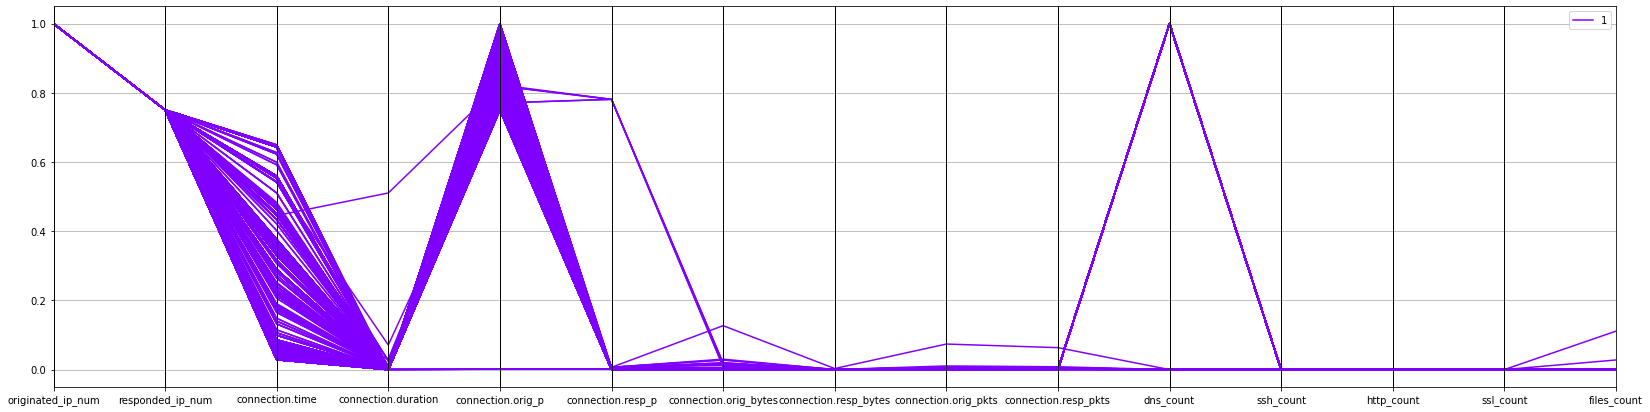

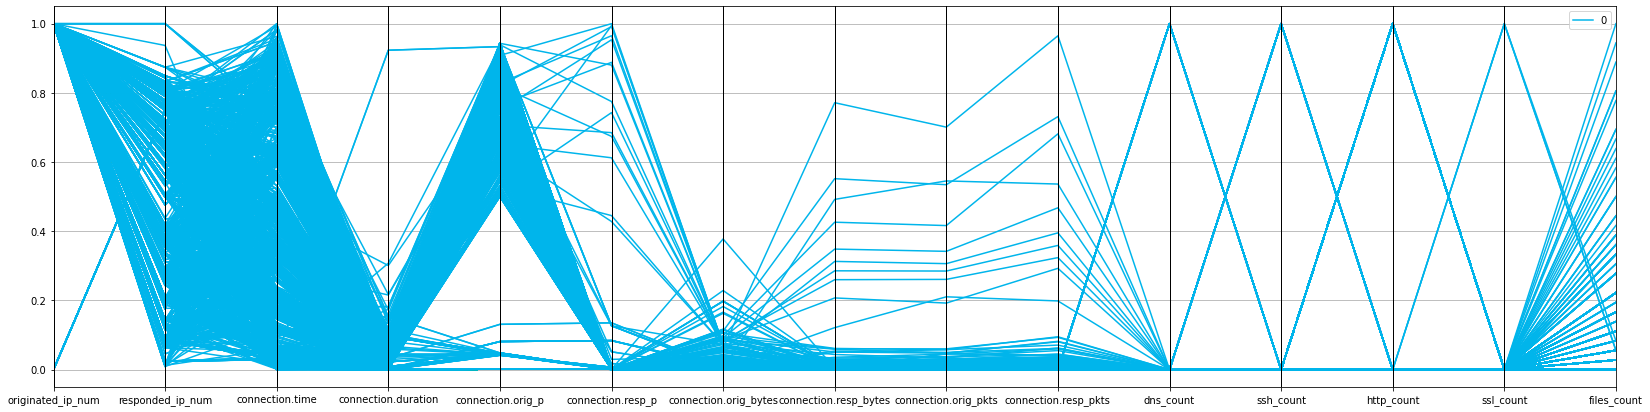

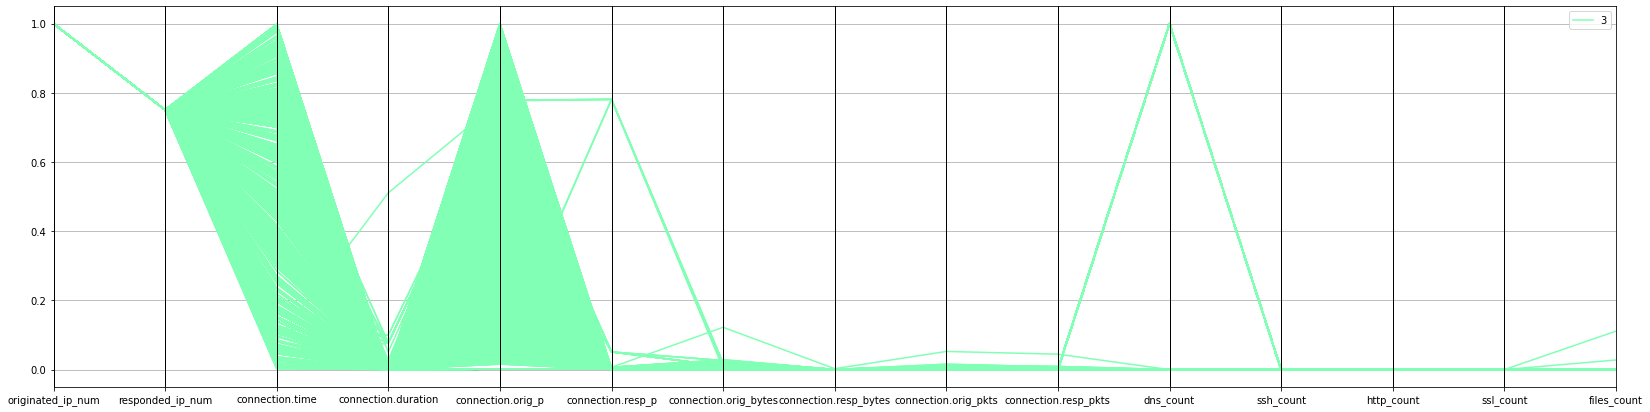

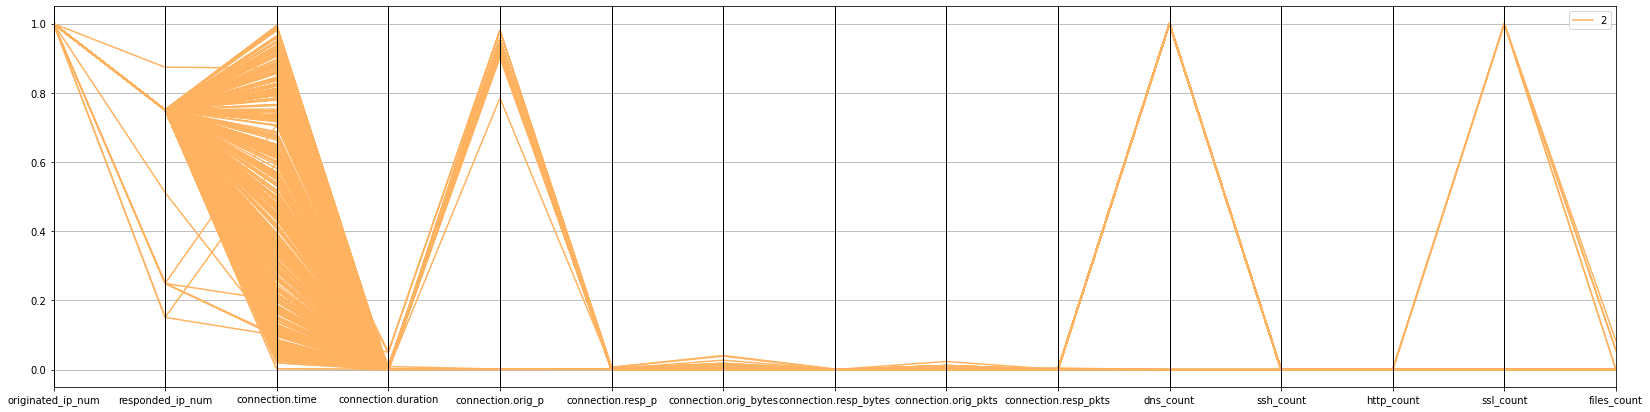

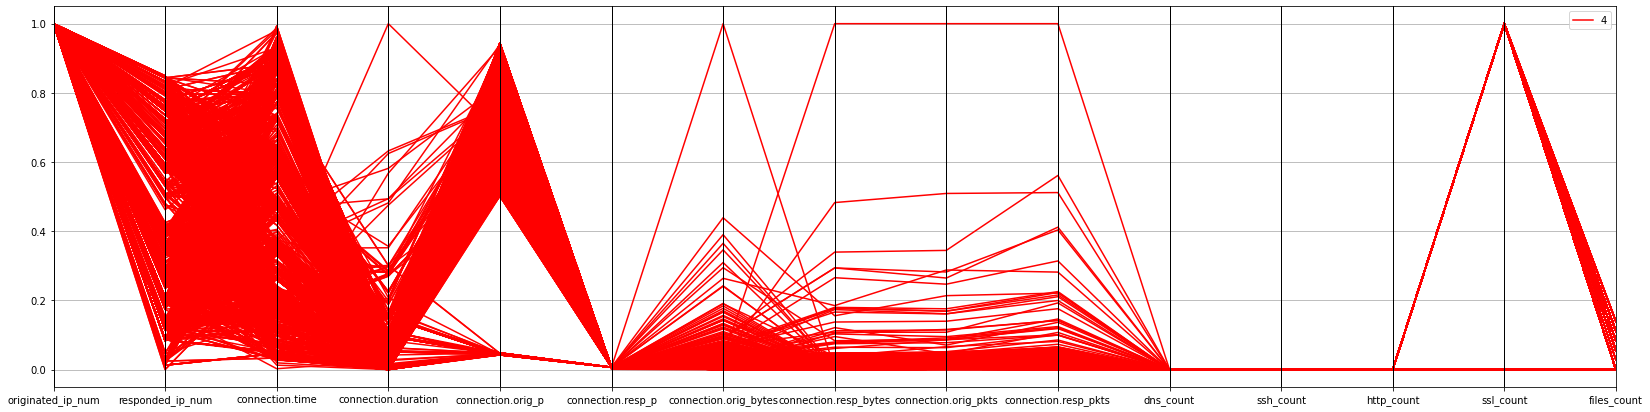

In [80]:
import pandas as pd

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (28,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()

With dominant neighbourhood:

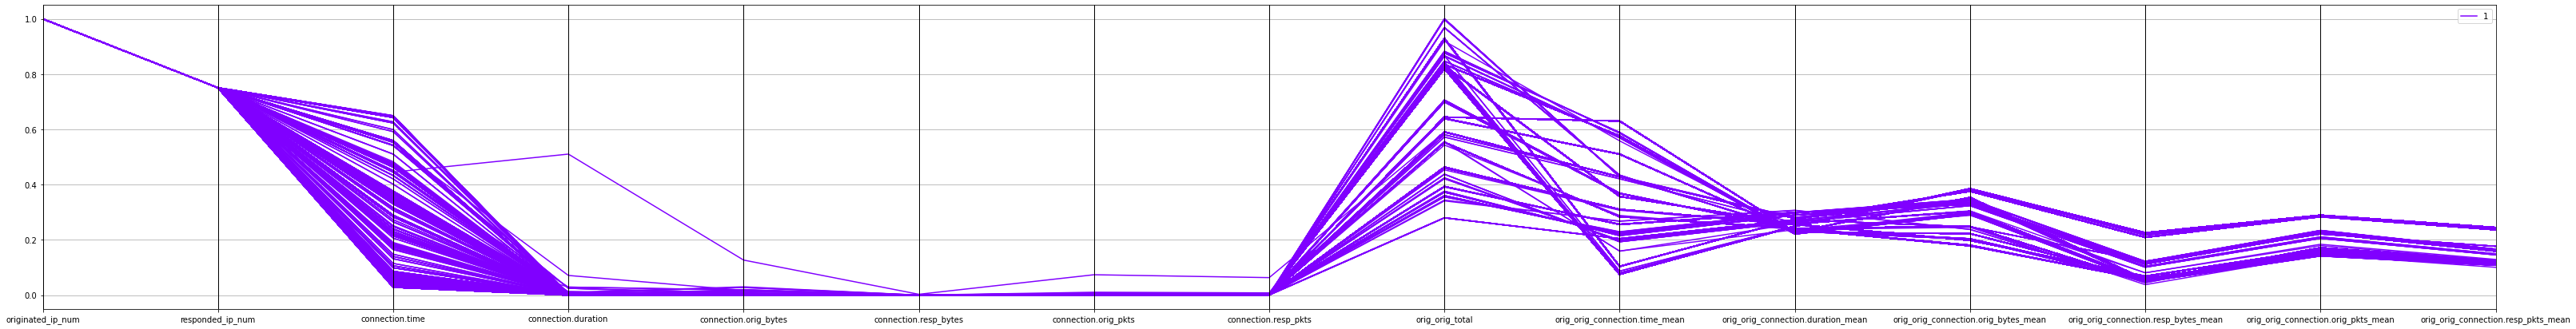

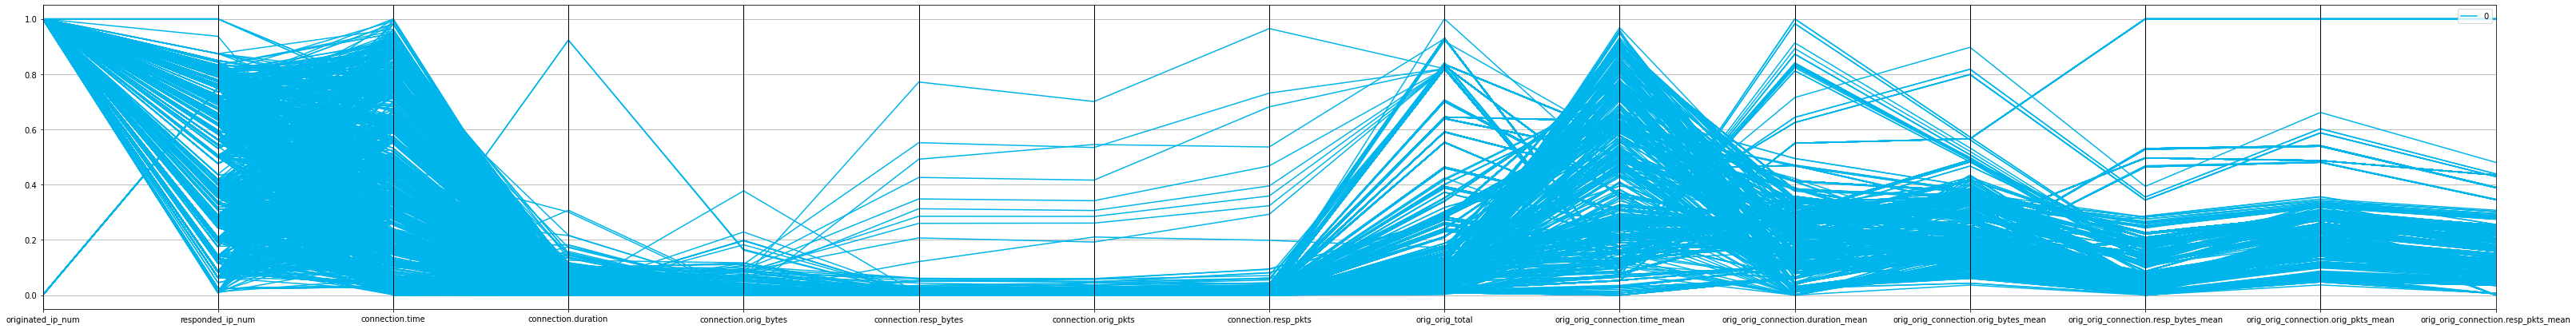

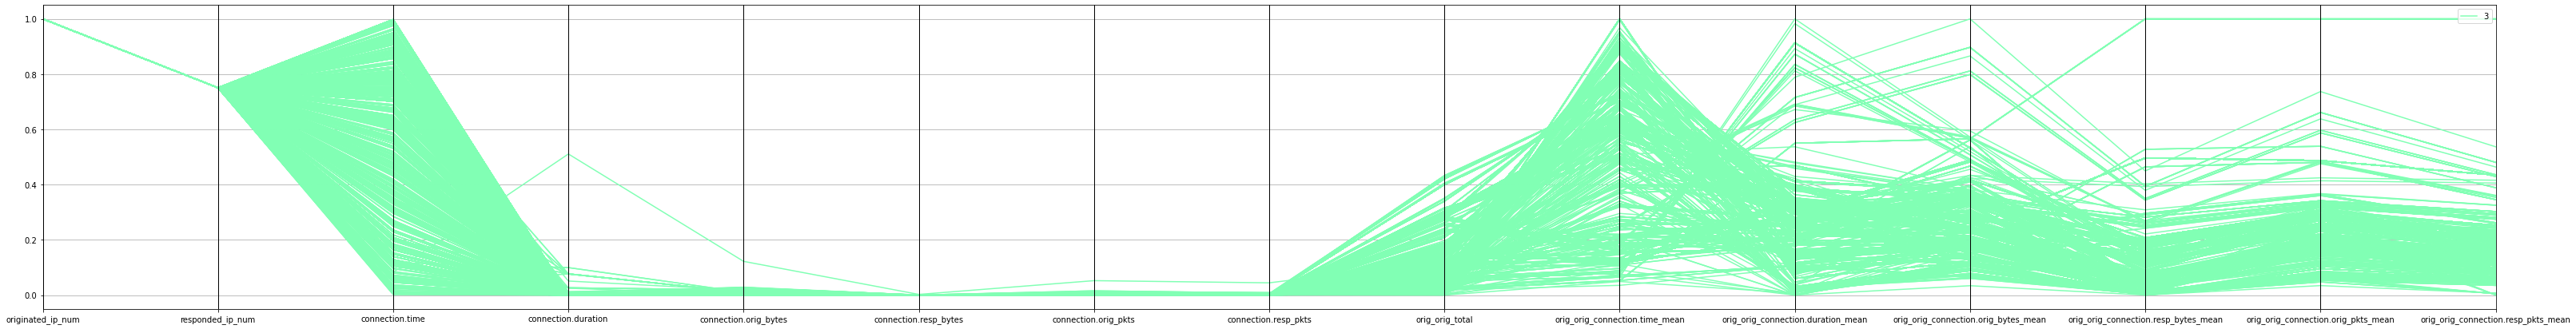

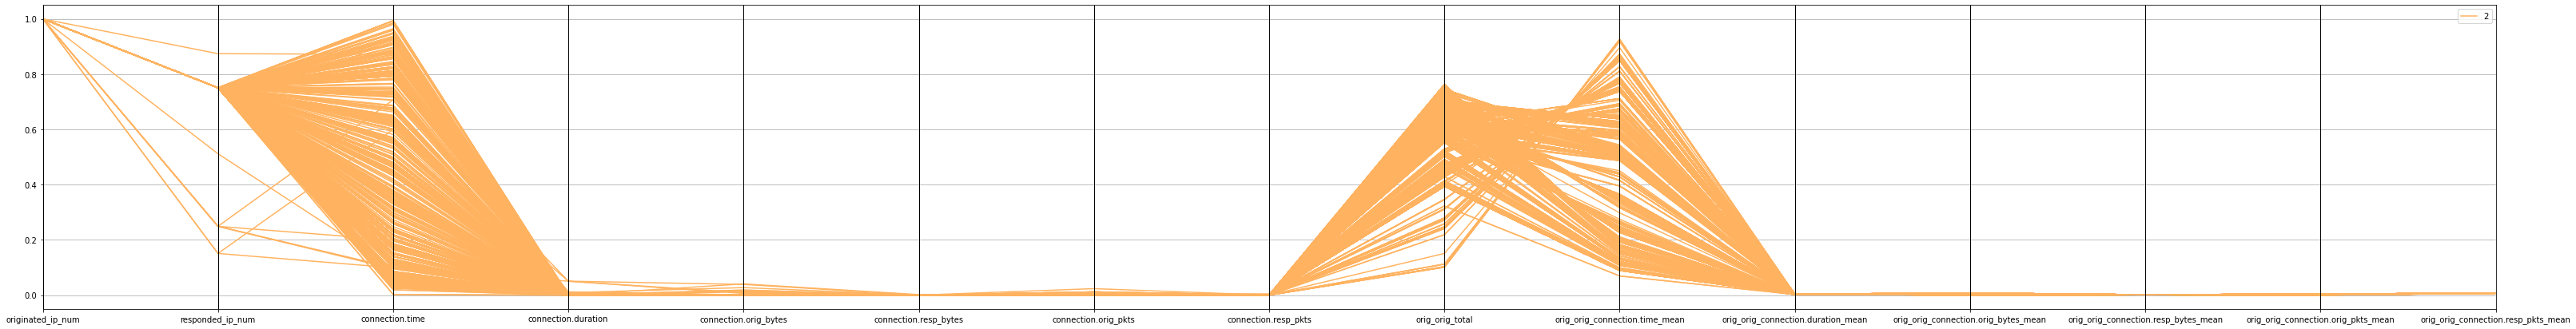

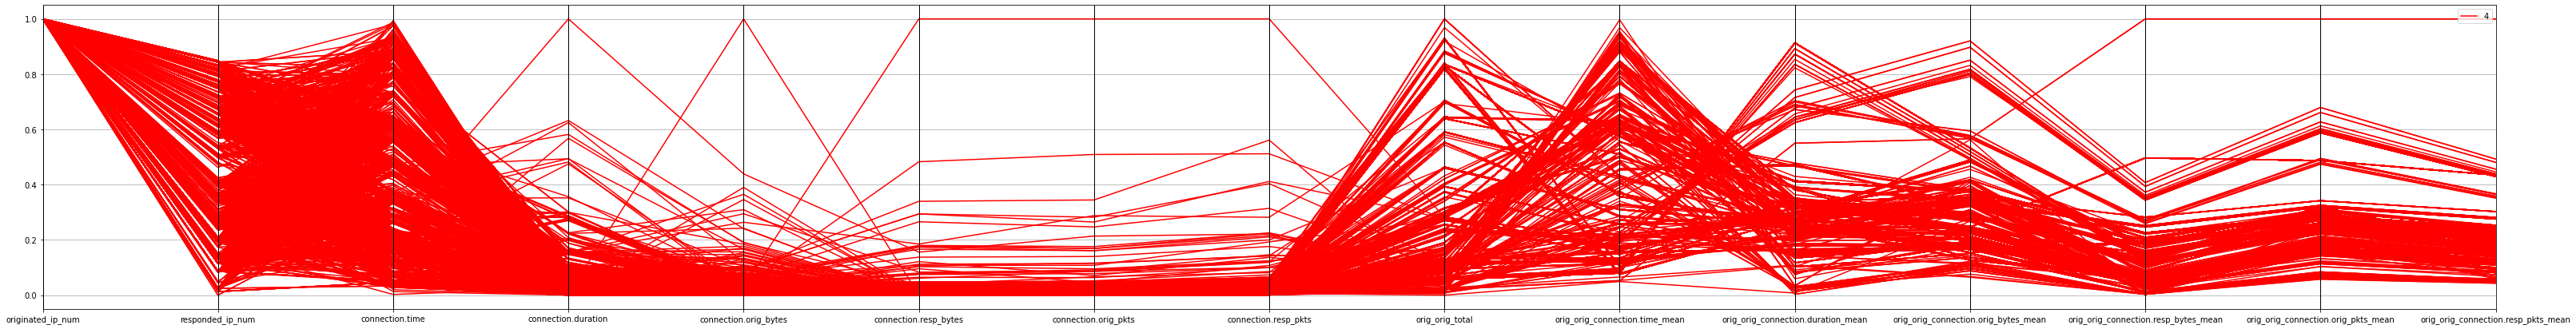

In [81]:
INTERPRETATION_COLS = ['uid', 
                       'originated_ip_num', 'originated_ip', 
                       'responded_ip_num', 'responded_ip', 
                       'timestamp', 'connection.time', 
                       'duration', 'connection.duration',
                       'protocol', 'service', 'conn_state',
                       'connection.orig_p', 'o_port', 'orig_p_cat', 'connection.orig_bytes', 'o_bytes', 'connection.orig_pkts', 'connection.orig_pkts.1', #'o_ip_bytes', 
                       'connection.resp_p', 'r_port', 'resp_p_cat', 'connection.resp_bytes', 'r_bytes', 'connection.resp_pkts', 'connection.resp_pkts.1', #'r_ip_bytes',
                       'dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count', 
                       'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean',
                       'attacker_label', 'victim_label']

labels_df = selected_df[INTERPRETATION_COLS]

result = pd.concat([pca_X, labels_df], axis=1)

features_df = labels_df[['originated_ip_num', 
                     'responded_ip_num', 
                     'connection.time', 
                     'connection.duration', 
                     #'connection.orig_p', 'connection.resp_p', 
                     'connection.orig_bytes', 'connection.resp_bytes', 
                     'connection.orig_pkts', 'connection.resp_pkts', 
                        'orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.resp_pkts_mean']]

coord_vis_df = pd.concat([features_df, pca_X['cluster']], axis=1)
coord_vis_df = coord_vis_df #.sample(100)

clusters = pca_X['cluster'].unique()

for i in range(len(clusters)):
    plt.rcParams["figure.figsize"] = (55,7)
    pd.plotting.parallel_coordinates(coord_vis_df.loc[coord_vis_df['cluster'] == clusters[i]], 'cluster', color=colors[i])
    plt.show()